## Import Modules


In [ ]:
!pip install prophet


In [ ]:
!pip install tqdm

In [4]:
# Python
import pandas as pd
from prophet import Prophet
import tqdm as notebook_tqdm
import functions

In [7]:
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

from prophet.plot import plot_plotly, plot_components_plotly
from prophet.plot import add_changepoints_to_plot
from prophet.diagnostics import cross_validation
from statsmodels.tools.eval_measures import rmse
from statsmodels.tools.eval_measures import mse
import matplotlib.pyplot as plt

# to mute Pandas warnings Prophet needs to fix
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from prophet.diagnostics import performance_metrics


In [8]:

import numpy as np
import pandas as pd
import datetime as dt
from sklearn import metrics
import math
import itertools
from tqdm import tqdm
from multiprocessing import Pool, cpu_count

In [27]:
#turn off cmd stampy
import logging
logger = logging.getLogger('cmdstanpy')
logger.addHandler(logging.NullHandler())
logger.propagate = False
logger.setLevel(logging.CRITICAL)

In [9]:
least_restricted = pd.read_csv('../data/least_restricted.csv')
most_restricted = pd.read_csv('../data/most_restricted.csv')

In [10]:
interesting_columns = ['depression', 'anxiety', 'addiction', 'counselling','mental_health']

least_restricted_df = {}
most_restricted_df = {}

for c in interesting_columns:
    lr = least_restricted[['week', c]]
    lr = lr.rename(columns={'week': 'ds', c: 'y'})
    least_restricted_df[c] = lr
    
    lr = most_restricted[['week', c]]
    lr = lr.rename(columns={'week': 'ds', c: 'y'})
    most_restricted_df[c] = lr

### Creating DataFrames for each set of lockdowns

### States With Most restrictions 
Alaska
California
Hawaii
Mass
Newyork
Washington 

### States with least restrictions 
Arizona
Florida
South Dakota
Texas





In [11]:
# Python
most_lockdowns = pd.DataFrame([
    {'holiday': 'stay_at_home', 'ds': '2020-03-23', 'lower_window': 0, 'ds_upper': '2020-06-07'},
    {'holiday': 'mask_mandate', 'ds': '2020-04-19', 'lower_window': 0, 'ds_upper': '2022-03-13'},
    {'holiday': 'gatherings_banned', 'ds': '2020-03-22', 'lower_window': 0, 'ds_upper': '2021-04-18'},
    {'holiday': 'business_closures', 'ds': '2020-03-22', 'lower_window': 0, 'ds_upper': '2021-05-23'},
    {'holiday': 'travel_restrictions', 'ds': '2020-03-22', 'lower_window': 0, 'ds_upper': '2021-09-05'},
])
for t_col in ['ds', 'ds_upper']:
    most_lockdowns[t_col] = pd.to_datetime(most_lockdowns[t_col])
most_lockdowns['upper_window'] = (most_lockdowns['ds_upper'] - most_lockdowns['ds']).dt.days
most_lockdowns

holiday         ds  lower_window   ds_upper  upper_window
0         stay_at_home 2020-03-23             0 2020-06-07            76
1         mask_mandate 2020-04-19             0 2022-03-13           693
2    gatherings_banned 2020-03-22             0 2021-04-18           392
3    business_closures 2020-03-22             0 2021-05-23           427
4  travel_restrictions 2020-03-22             0 2021-09-05           532

In [12]:
# Python
least_lockdowns = pd.DataFrame([
    {'holiday': 'stay_at_home', 'ds': '2020-04-05', 'lower_window': 0, 'ds_upper': '2020-05-10'},
    {'holiday': 'gatherings_banned', 'ds': '2020-04-05', 'lower_window': 0, 'ds_upper': '2020-09-20'},
    {'holiday': 'business_closures', 'ds': '2020-04-05', 'lower_window': 0, 'ds_upper': '2021-03-14'},
    {'holiday': 'travel_restrictions', 'ds': '2020-04-12', 'lower_window': 0, 'ds_upper': '2020-05-10'},
])
for t_col in ['ds', 'ds_upper']:
    least_lockdowns[t_col] = pd.to_datetime(least_lockdowns[t_col])
least_lockdowns['upper_window'] = (least_lockdowns['ds_upper'] - least_lockdowns['ds']).dt.days
least_lockdowns

holiday         ds  lower_window   ds_upper  upper_window
0         stay_at_home 2020-04-05             0 2020-05-10            35
1    gatherings_banned 2020-04-05             0 2020-09-20           168
2    business_closures 2020-04-05             0 2021-03-14           343
3  travel_restrictions 2020-04-12             0 2020-05-10            28

# Predicting 2020-5-30
# Most restricted states with exogenous features

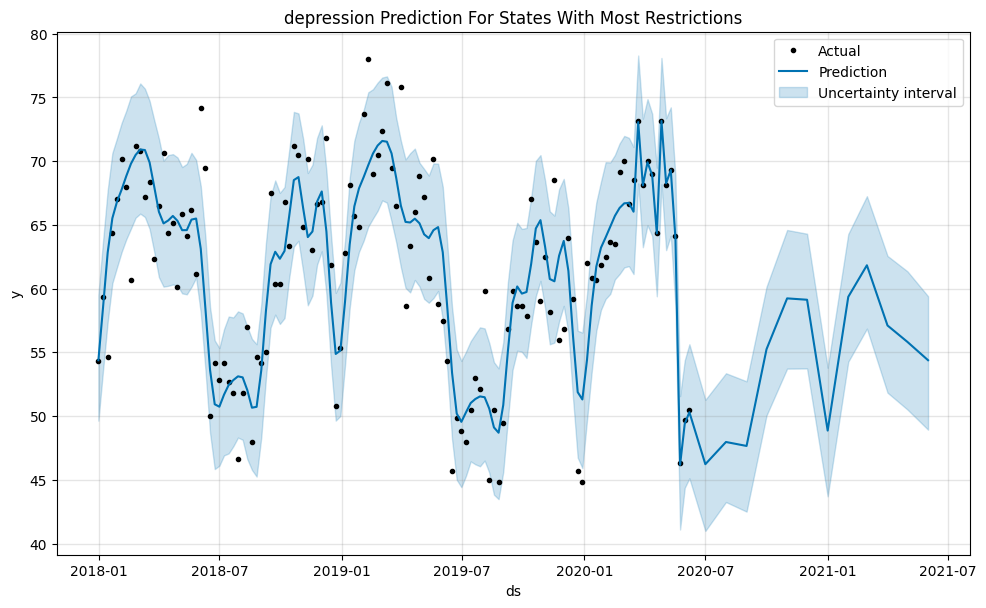

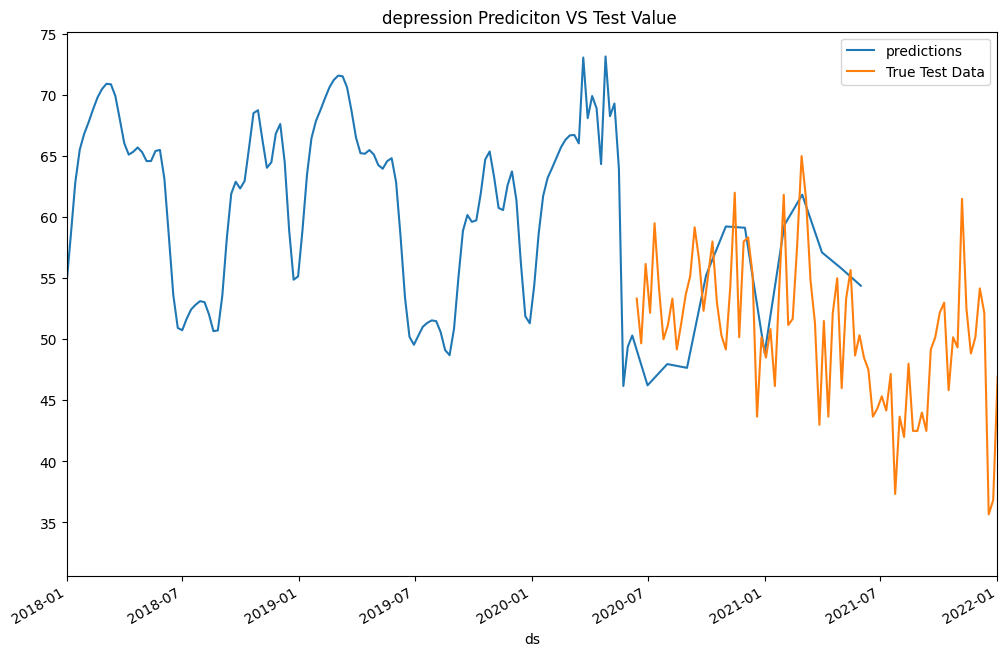

MSE for depression: 201


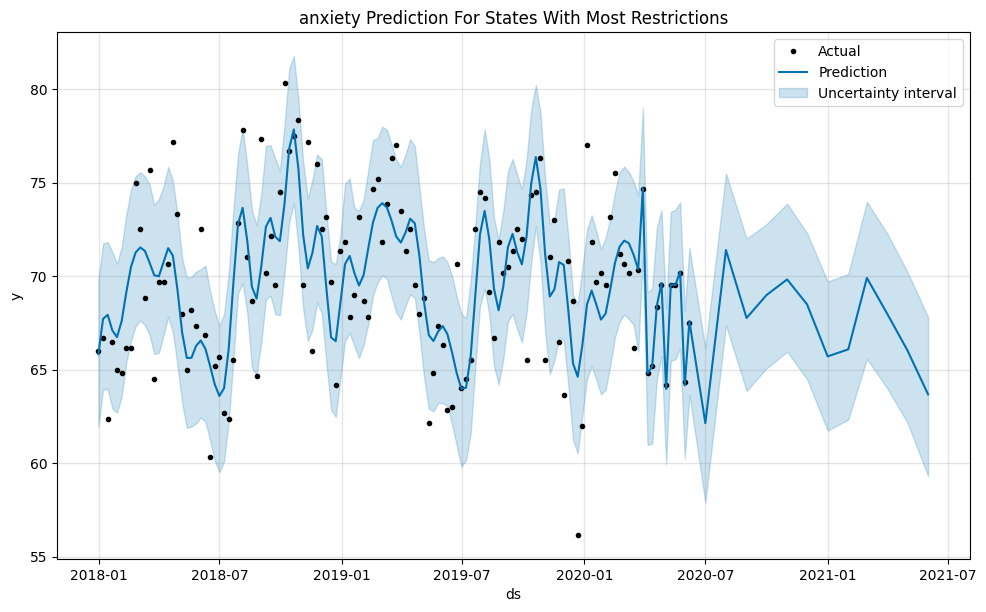

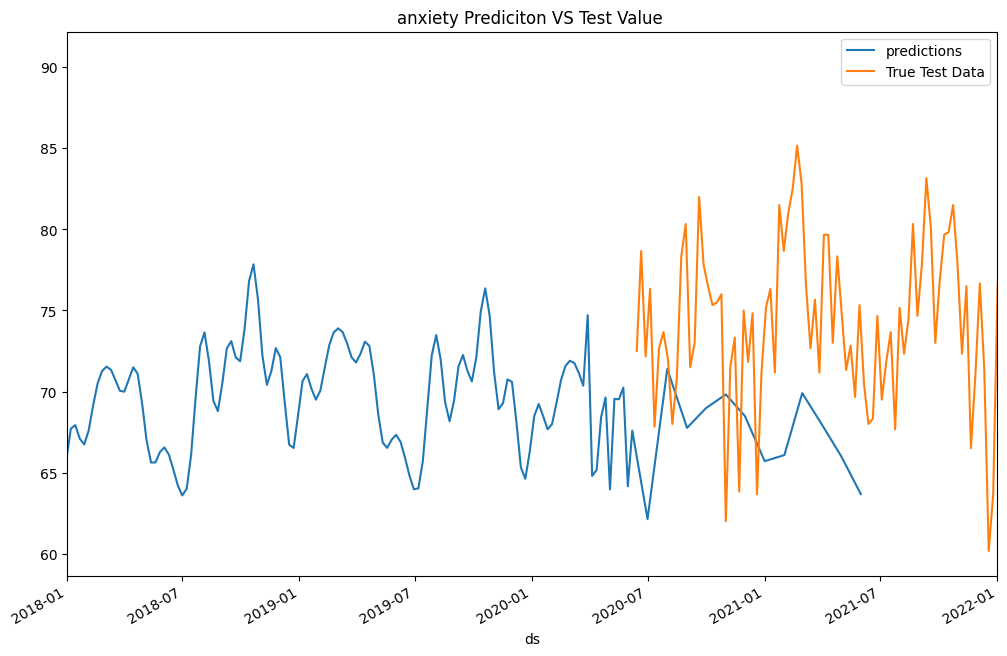

MSE for anxiety: 58


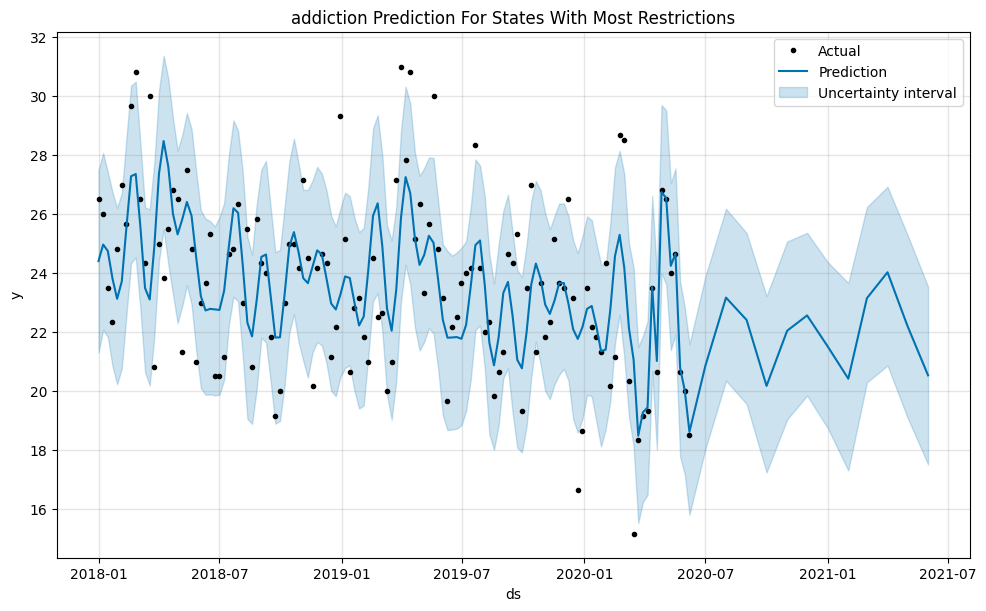

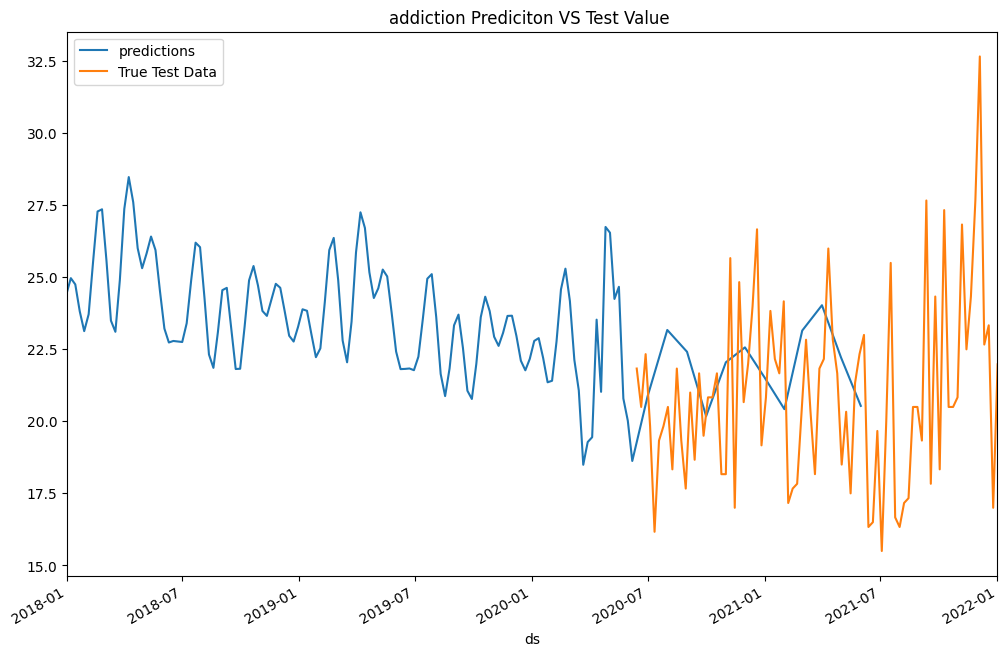

MSE for addiction: 19


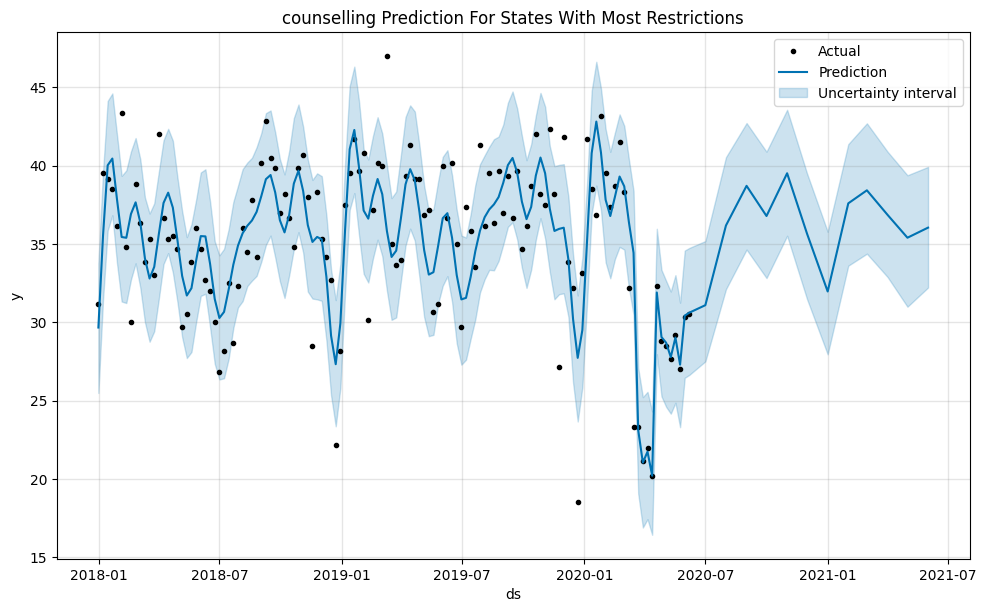

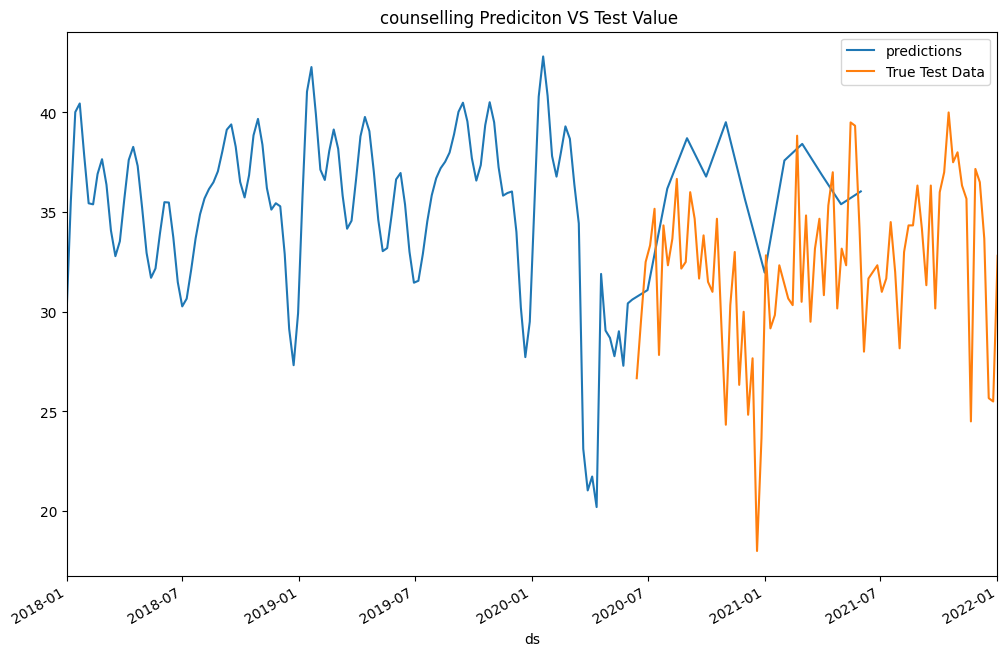

MSE for counselling: 40


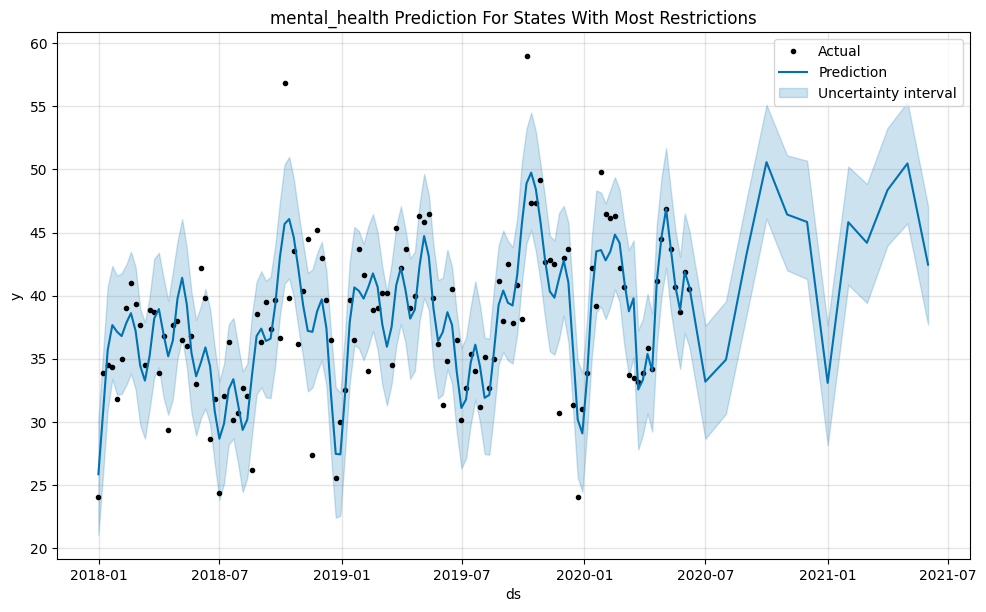

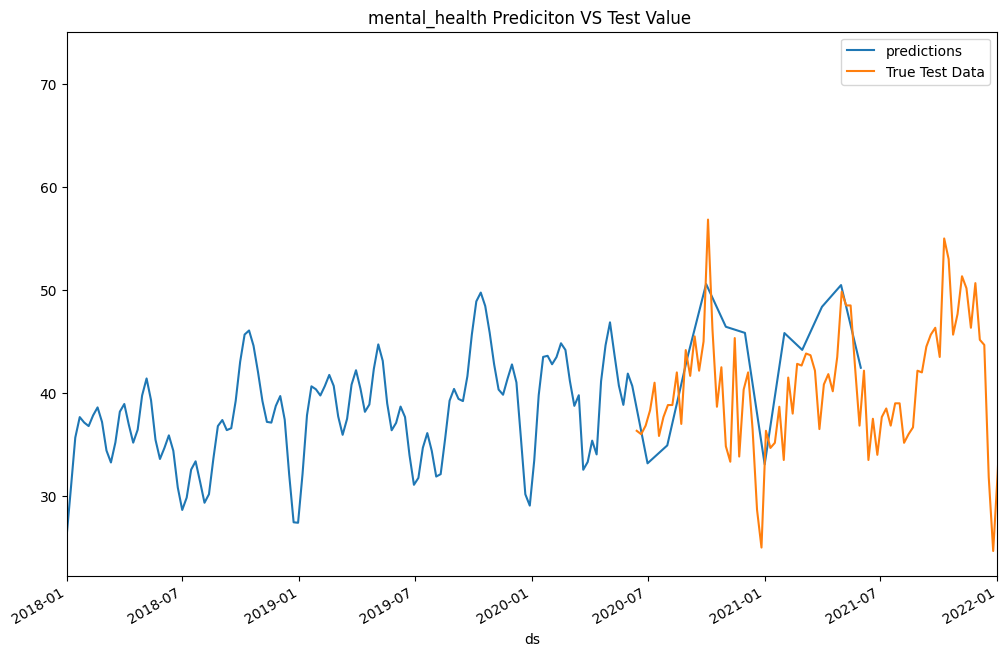

MSE for mental_health: 139


In [33]:
mse_dic_most_start = {}

for c in interesting_columns:
    item = most_restricted_df[c]
    item['ds']=pd.to_datetime(item.ds)

    
    train=item[:128]
    test=item[128:]
    m=Prophet(holidays=most_lockdowns,seasonality_mode='multiplicative',daily_seasonality=False,weekly_seasonality=False)
    m.fit(train)
    future=m.make_future_dataframe(periods=12,freq='MS')
    forecast=m.predict(future)
    m.plot(forecast)
    plt.legend(['Actual', 'Prediction', 'Uncertainty interval'])
    plt.title(f'{c} Prediction For States With Most Restrictions')
    ax=forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
    test.plot(x='ds',y='y',legend=True,label='True Test Data',ax=ax,xlim=('2018-01-01','2022-01-01'))
    predictions = forecast.iloc[-len(test):]['yhat']
    actuals = test['y']
    plt.title(f'{c} Prediciton VS Test Value ')
    plt.show()
    dic_mse = round(mse(predictions, actuals))
    mse_dic_most_start[f'{c}_ex'] = dic_mse
    print(f"MSE for {c}: {round(mse(predictions, actuals))}")

# Most restricted without exogenous features  2020-5-30

In [34]:

for c in interesting_columns:
    item = most_restricted_df[c]
    item['ds']=pd.to_datetime(item.ds)
    
    train=item[:128]
    test=item[128:]
    m=Prophet(daily_seasonality=False,weekly_seasonality=False)
    m.fit(train)
    future=m.make_future_dataframe(periods=12,freq='MS')
    forecast=m.predict(future)
    predictions = forecast.iloc[-len(test):]['yhat']
    actuals = test['y']
    dic_mse = round(mse(predictions, actuals))
    mse_dic_most_start[c] = dic_mse
    print(f"MSE for {c}: {round(mse(predictions, actuals))}")


MSE for depression: 197
MSE for anxiety: 56
MSE for addiction: 18
MSE for counselling: 35
MSE for mental_health: 138


In [36]:
# Find differences between MSE with and without exogenous features. Negative values indicate that Exogenous features improved MSE
rf_diff_least = functions.dict_diff(mse_dic_most_start)
print(rf_diff_least)

{'depression': 4, 'anxiety': 2, 'addiction': 1, 'counselling': 5, 'mental_health': 1}


# Least restricitons with exogenous features 2020-5-30

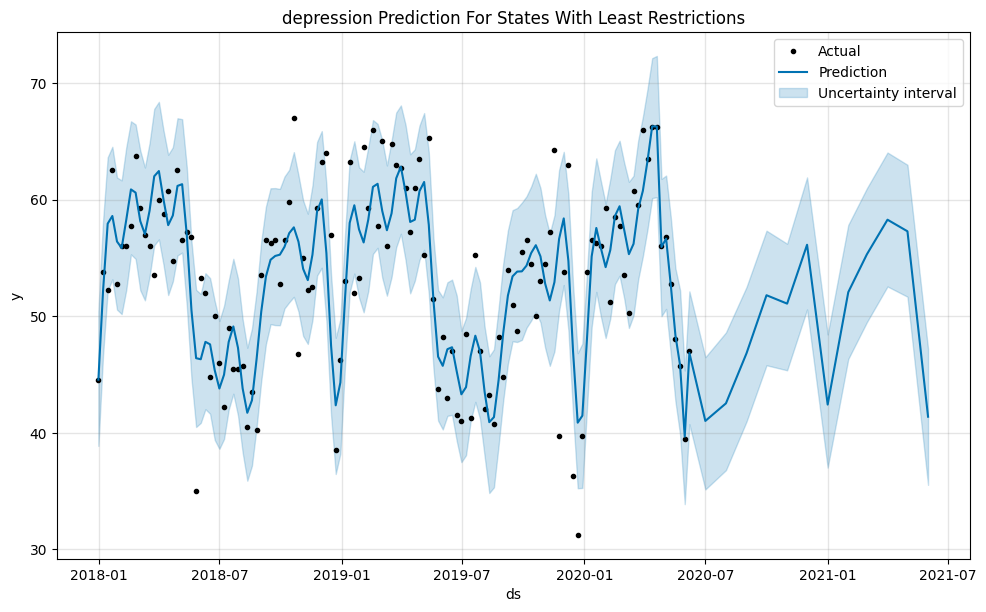

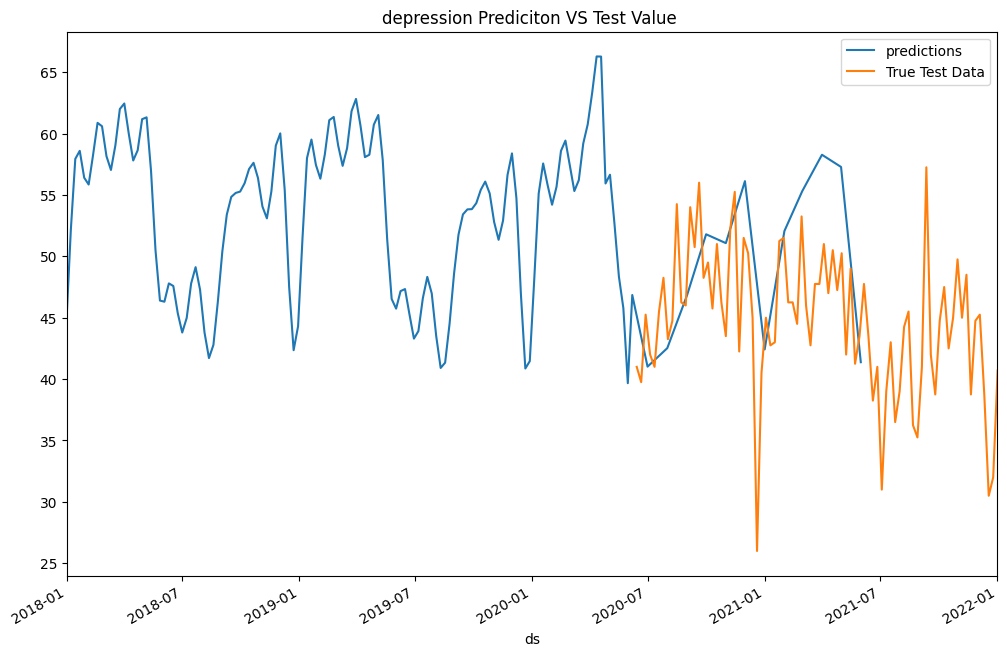

MSE for depression: 162


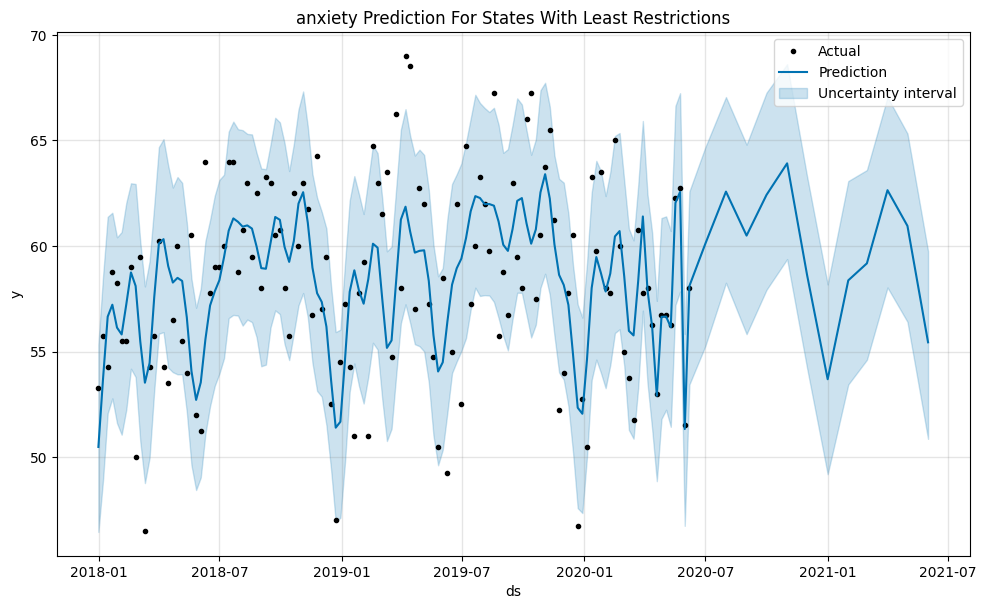

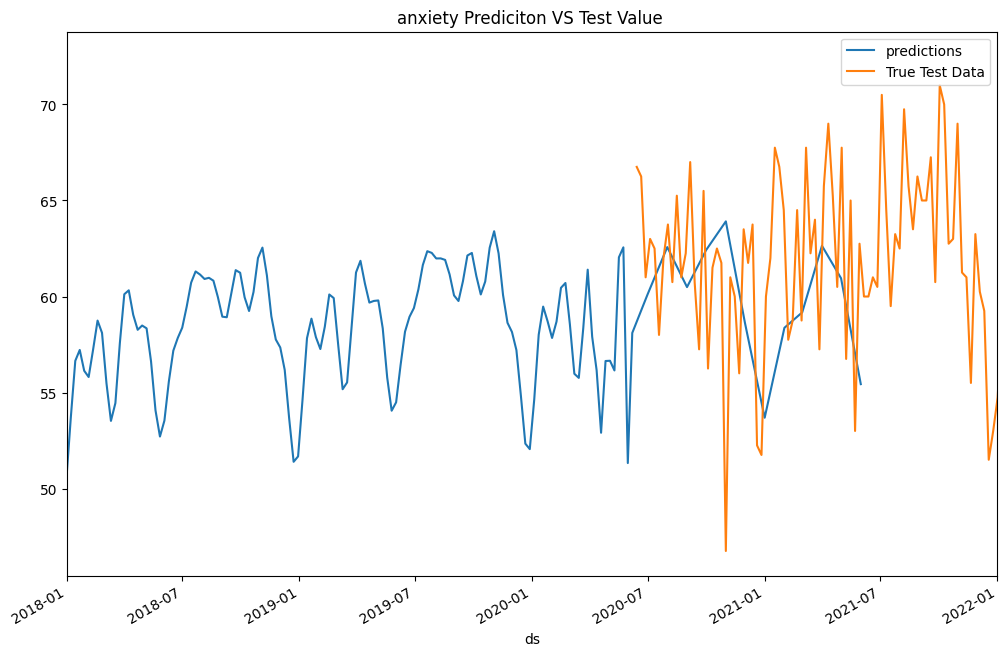

MSE for anxiety: 47


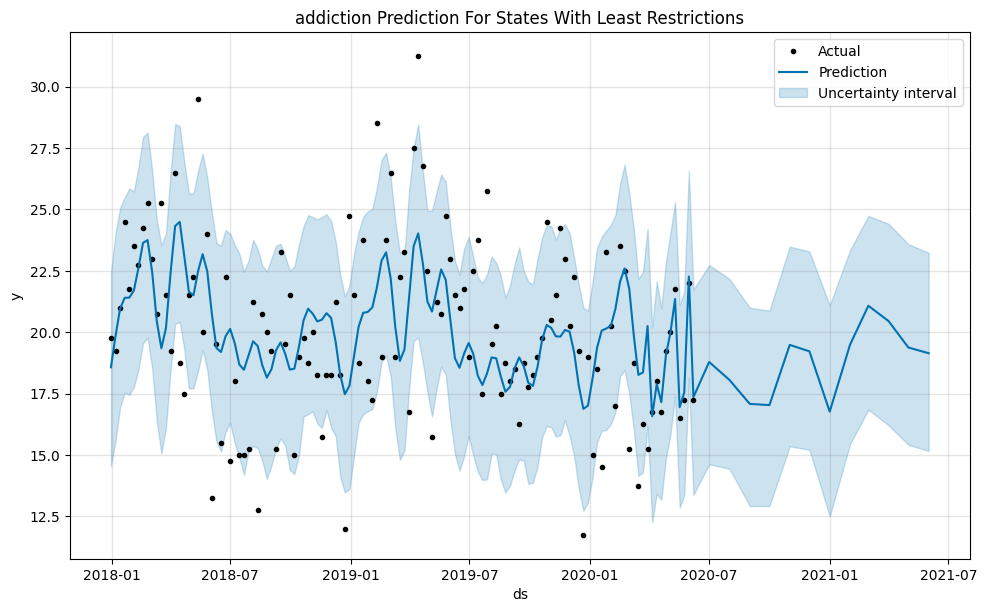

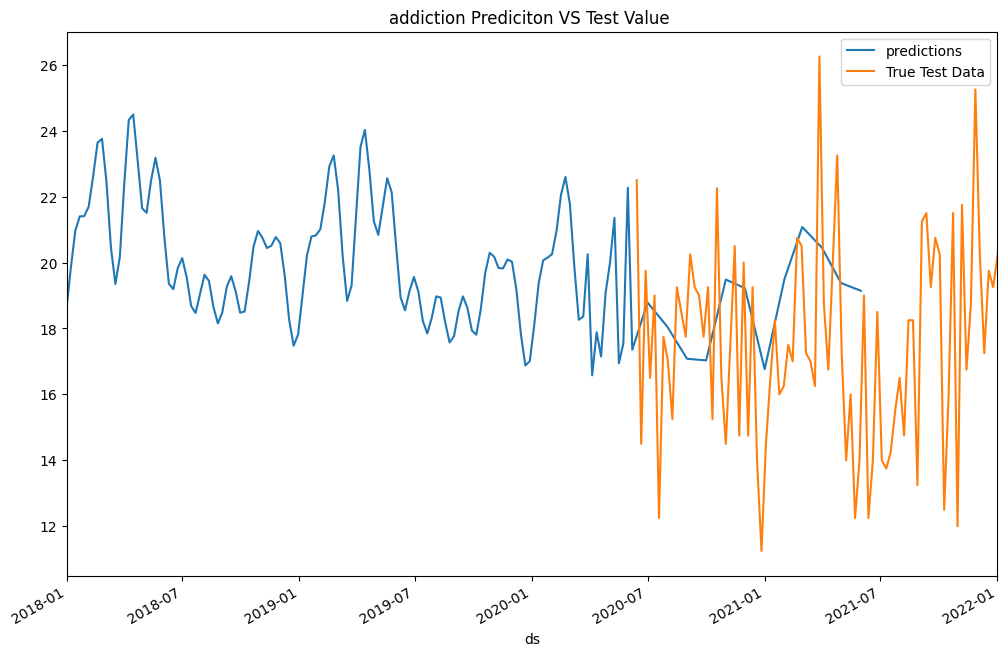

MSE for addiction: 16


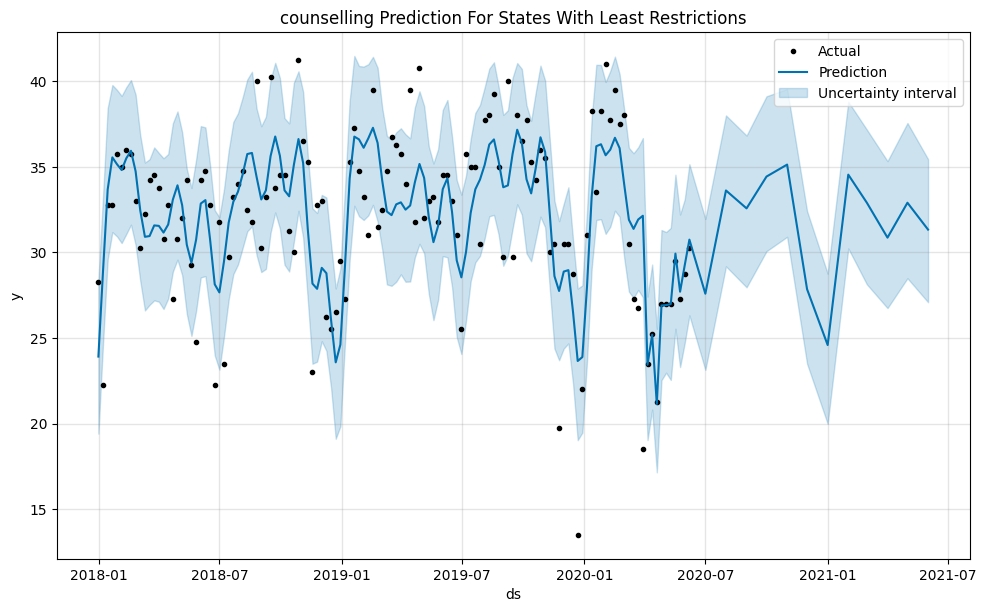

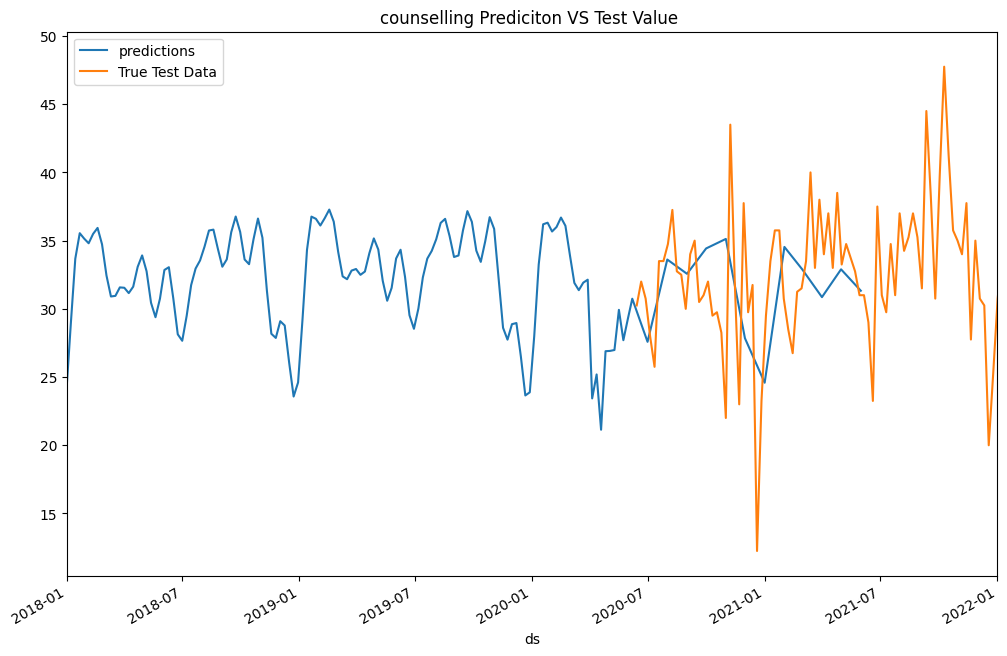

MSE for counselling: 51


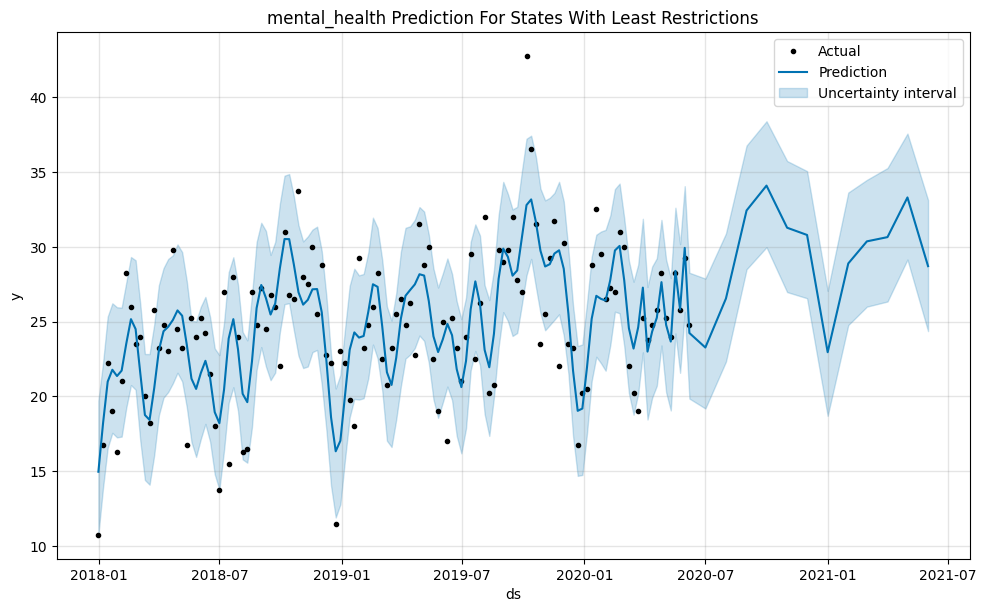

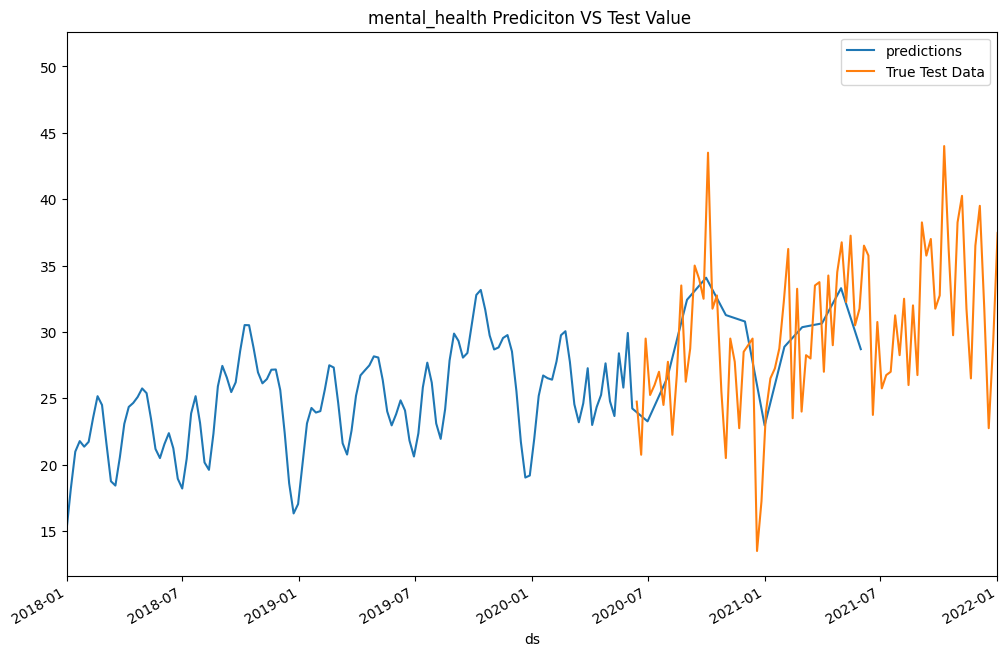

MSE for mental_health: 116


In [37]:
mse_dic_least_start = {}

for c in interesting_columns:
    item = least_restricted_df[c]
    item['ds']=pd.to_datetime(item.ds)

    

    
    train=item[:128]
    test=item[128:]
    m=Prophet(holidays=least_lockdowns,daily_seasonality=False,weekly_seasonality=False)
    m.fit(train)
    future=m.make_future_dataframe(periods=12,freq='MS')
    forecast=m.predict(future)
    m.plot(forecast)
    plt.legend(['Actual', 'Prediction', 'Uncertainty interval'])
    plt.title(f'{c} Prediction For States With Least Restrictions')
    ax=forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
    test.plot(x='ds',y='y',legend=True,label='True Test Data',ax=ax,xlim=('2018-01-01','2022-01-01'))
    predictions = forecast.iloc[-len(test):]['yhat']
    actuals = test['y']
    dic_mse = round(mse(predictions, actuals))
    mse_dic_least_start[f'{c}_ex'] = dic_mse
    plt.title(f'{c} Prediciton VS Test Value ')
    plt.show()


    print(f"MSE for {c}: {round(mse(predictions, actuals))}")

# Least restrictions without exogenous features

In [38]:
for c in interesting_columns:
    item = least_restricted_df[c]
    item['ds']=pd.to_datetime(item.ds)
    
    train=item[:128]
    test=item[128:]
    m=Prophet(daily_seasonality=False,weekly_seasonality=False)
    m.fit(train)
    future=m.make_future_dataframe(periods=12,freq='MS')
    forecast=m.predict(future)
    predictions = forecast.iloc[-len(test):]['yhat']
    actuals = test['y']
    dic_mse = round(mse(predictions, actuals))
    mse_dic_least_start[c] = dic_mse
    print(f"MSE for {c}: {round(mse(predictions, actuals))}")

MSE for depression: 160
MSE for anxiety: 45
MSE for addiction: 16
MSE for counselling: 51
MSE for mental_health: 116


In [22]:
# Find differences between MSE with and without exogenous features. Negative values indicate that Exogenous features improved MSE
rf_diff_least = functions.dict_diff(mse_dic_least_start)
print(rf_diff_least)

{'depression': 2, 'anxiety': 2, 'addiction': 0, 'counselling': 0, 'mental_health': 0}


# Forecasting Searches for Least Restricted States in the Middle of COVID-19 Pandemic

### Most Restricted States With exogenous features '2020-09-30'

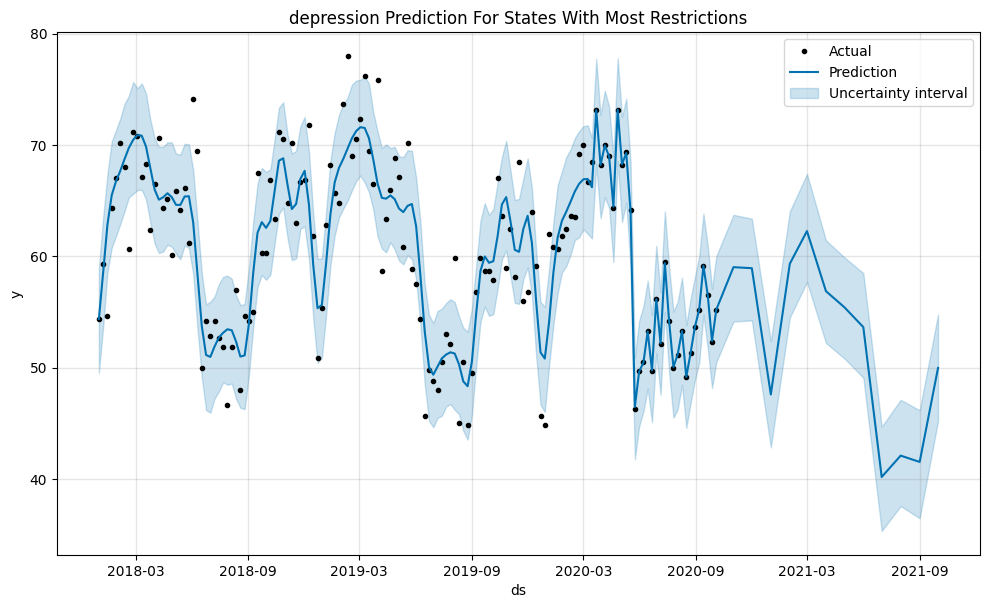

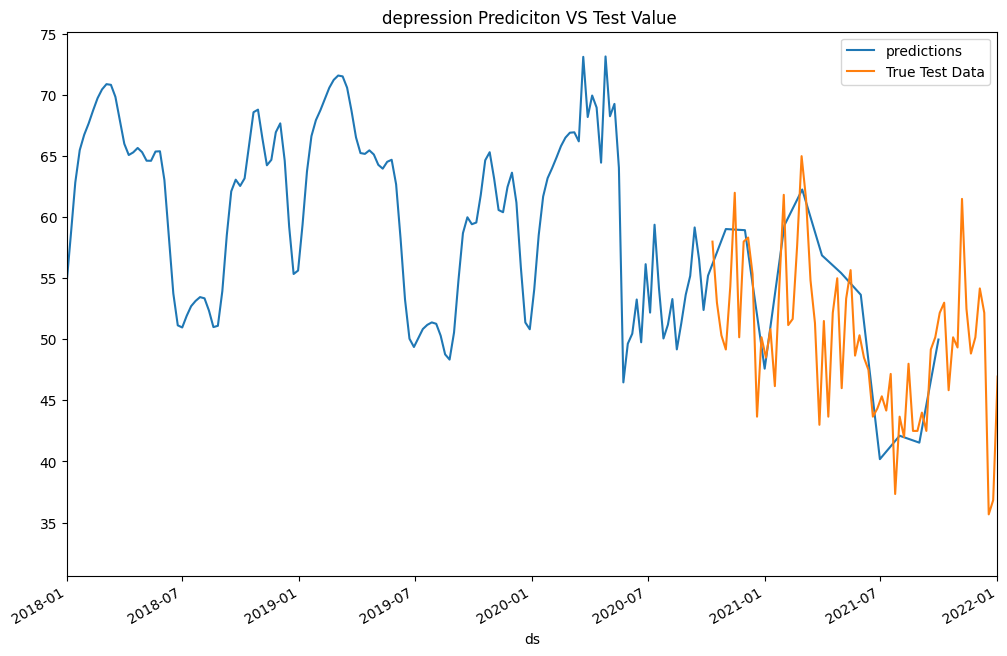

MSE for depression: 113


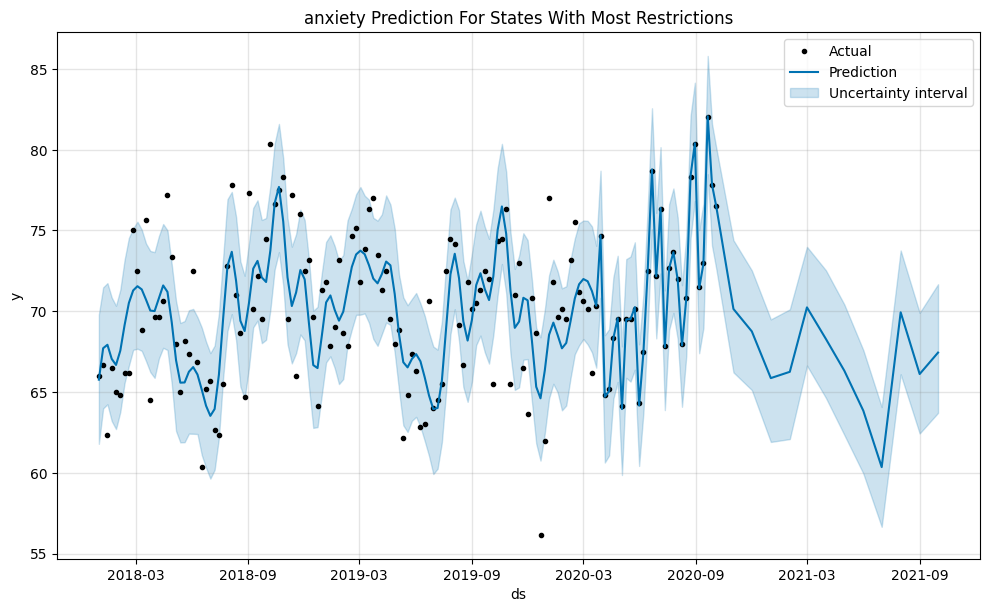

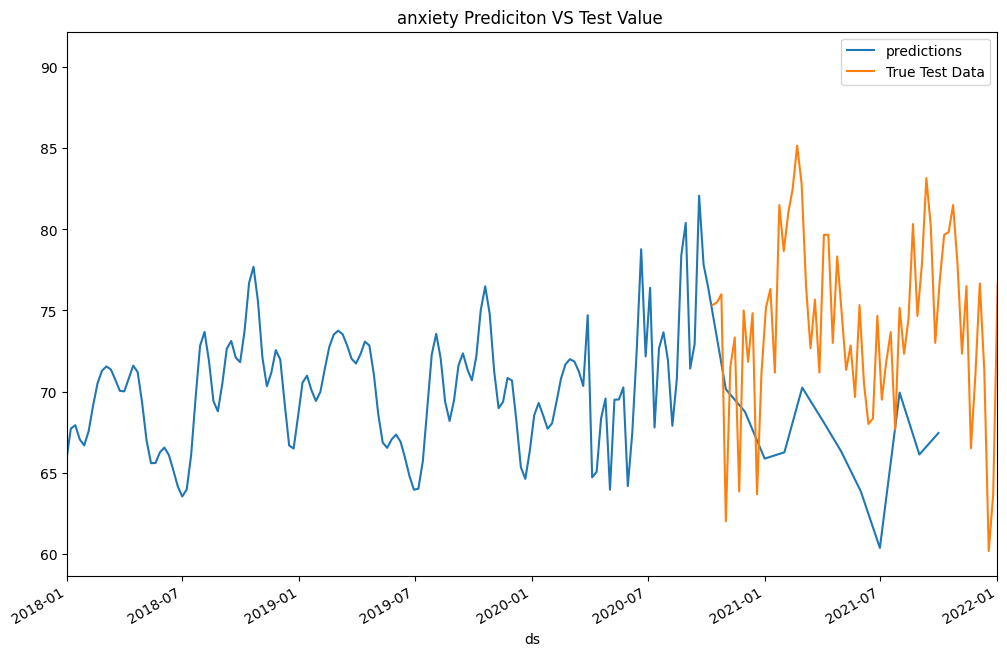

MSE for anxiety: 54


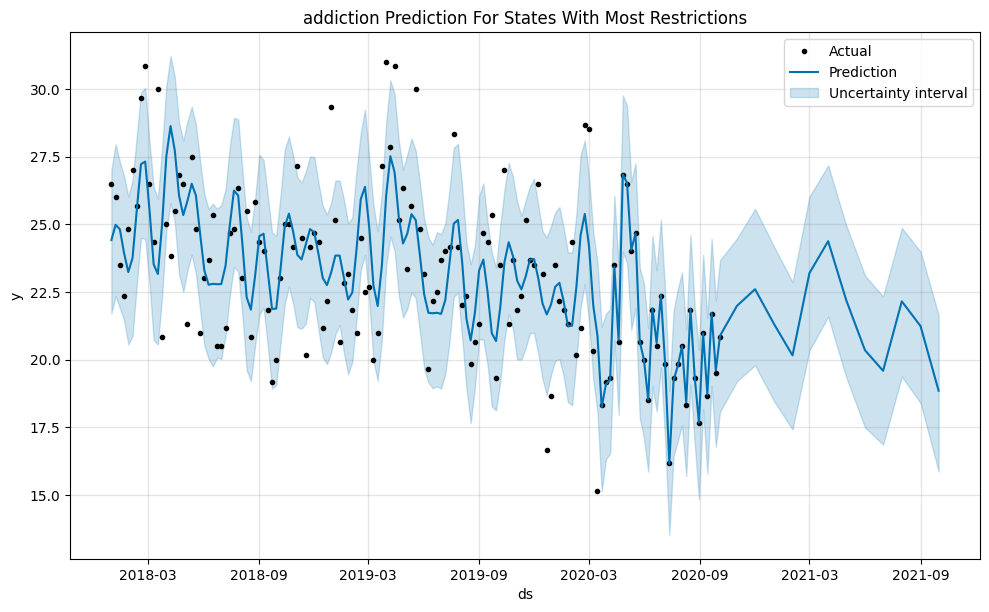

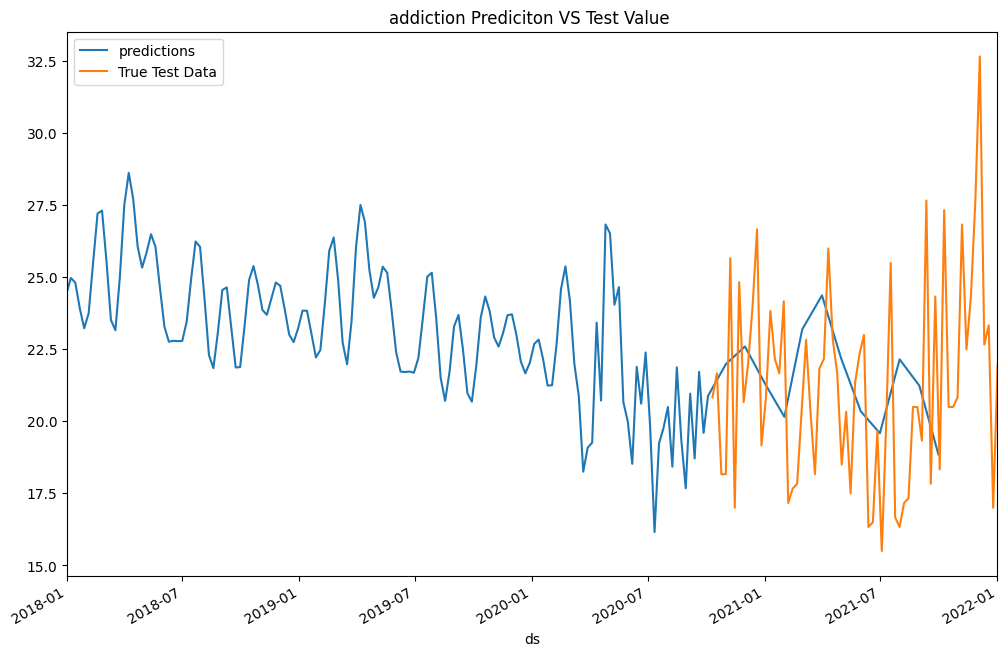

MSE for addiction: 13


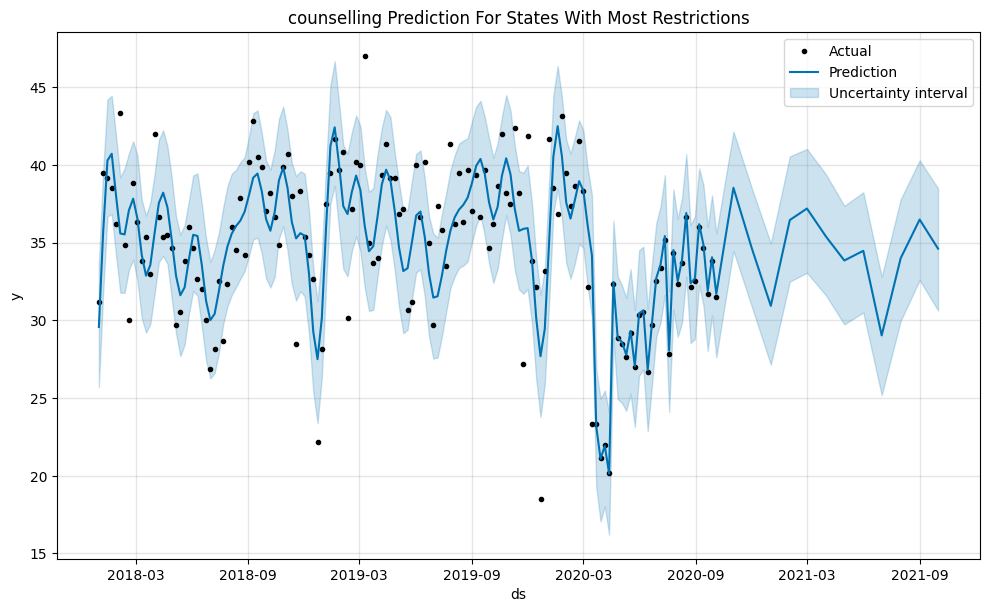

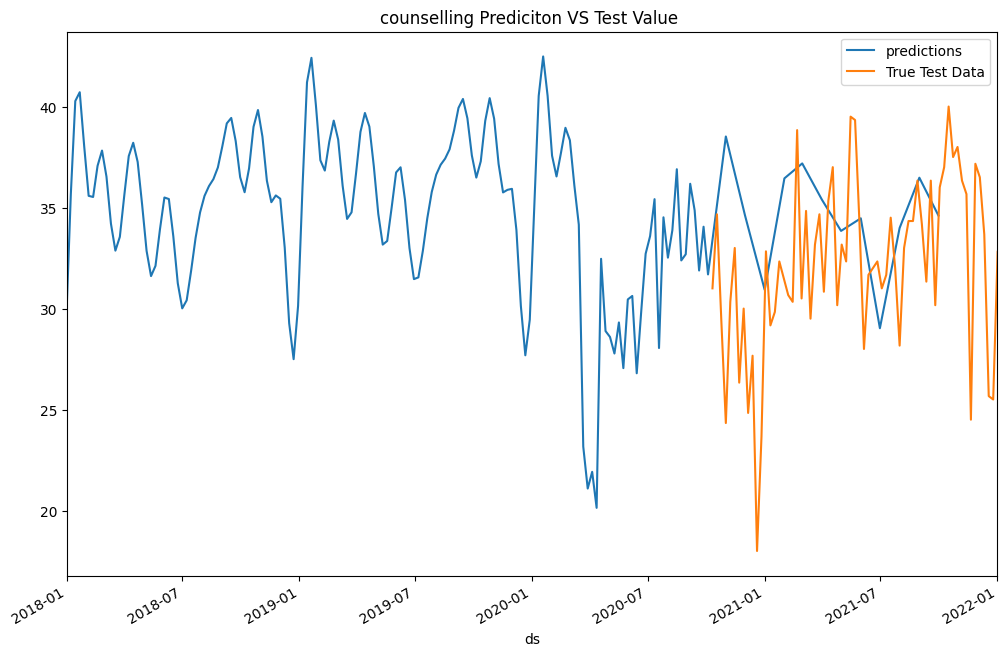

MSE for counselling: 35


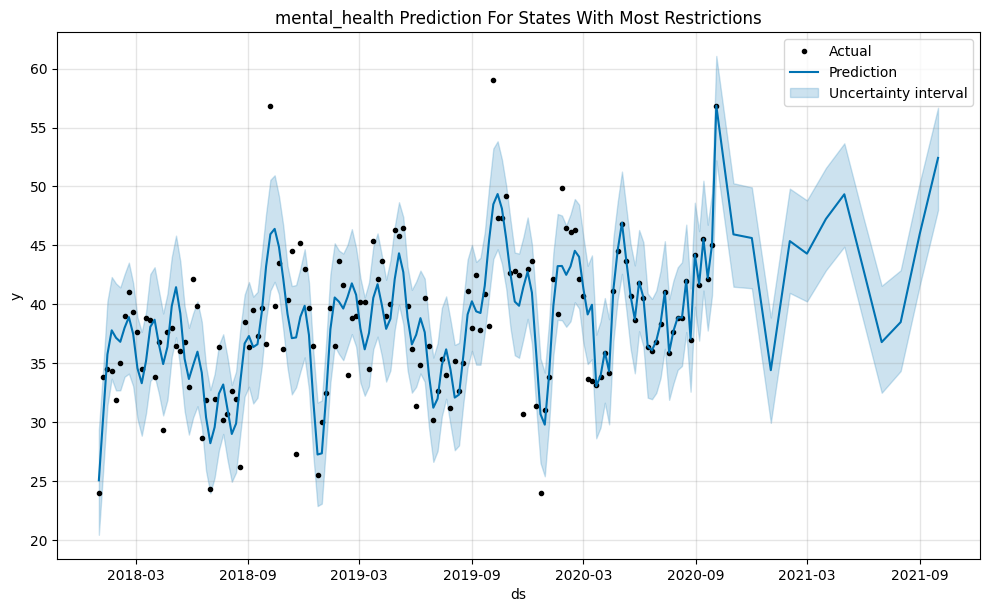

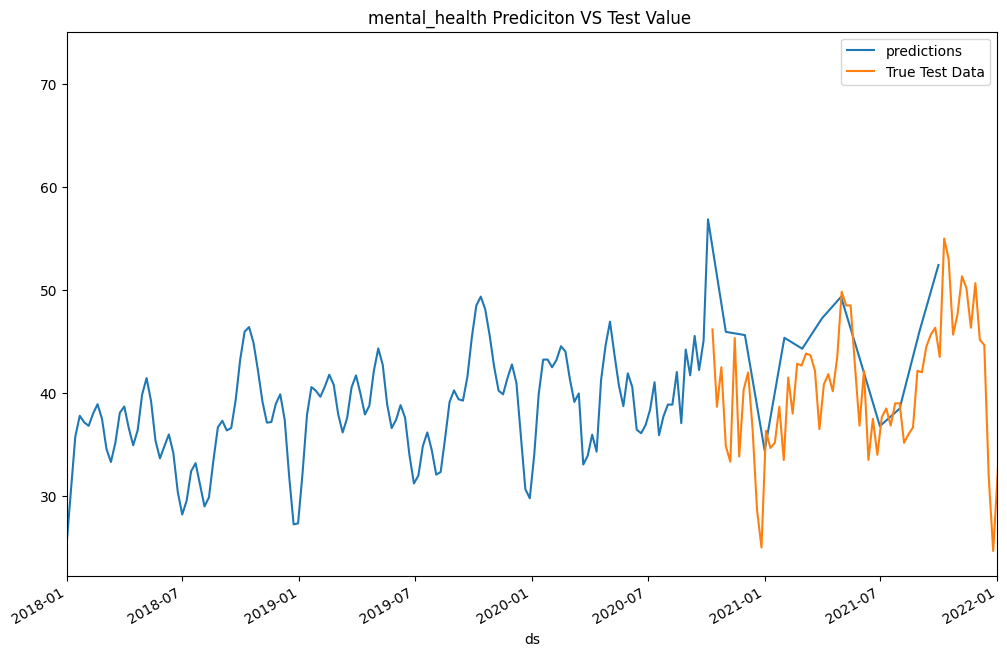

MSE for mental_health: 95


In [39]:
mse_dic_most_mid = {}
for c in interesting_columns:
    item = most_restricted_df[c]
    item['ds']=pd.to_datetime(item.ds)
    
    

    
    train=item[:145]
    test=item[145:]
    m=Prophet(holidays=most_lockdowns,daily_seasonality=False,weekly_seasonality=False)
    m.fit(train)
    future=m.make_future_dataframe(periods=12,freq='MS')
    forecast=m.predict(future)
    m.plot(forecast)
    plt.legend(['Actual', 'Prediction', 'Uncertainty interval'])
    plt.title(f'{c} Prediction For States With Most Restrictions')
    ax=forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
    test.plot(x='ds',y='y',legend=True,label='True Test Data',ax=ax,xlim=('2018-01-01','2022-01-01'))
    predictions = forecast.iloc[-len(test):]['yhat']
    actuals = test['y']
    dic_mse = round(mse(predictions, actuals))
    mse_dic_most_mid[f'{c}_ex'] = dic_mse
    plt.title(f'{c} Prediciton VS Test Value ')
    plt.show()


    print(f"MSE for {c}: {round(mse(predictions, actuals))}")

# Most restricted without exogenous features 2020-09-30

In [40]:

for c in interesting_columns:
    item = most_restricted_df[c]
    item['ds']=pd.to_datetime(item.ds)
    
    train=item[:145]
    test=item[145:]
    m=Prophet(seasonality_mode='multiplicative',daily_seasonality=False,weekly_seasonality=False)
    m.fit(train)
    future=m.make_future_dataframe(periods=12,freq='MS')
    forecast=m.predict(future)
    predictions = forecast.iloc[-len(test):]['yhat']
    actuals = test['y']
    dic_mse = round(mse(predictions, actuals))
    mse_dic_most_mid[c] = dic_mse
    print(f"MSE for {c}: {round(mse(predictions, actuals))}")


MSE for depression: 116
MSE for anxiety: 43
MSE for addiction: 12
MSE for counselling: 28
MSE for mental_health: 90


In [41]:
rf_diff_least = functions.dict_diff(mse_dic_most_mid)
print(rf_diff_least)

{'depression': -3, 'anxiety': 11, 'addiction': 1, 'counselling': 7, 'mental_health': 5}


# Least Restricted States With exogenous features '2020-09-30'

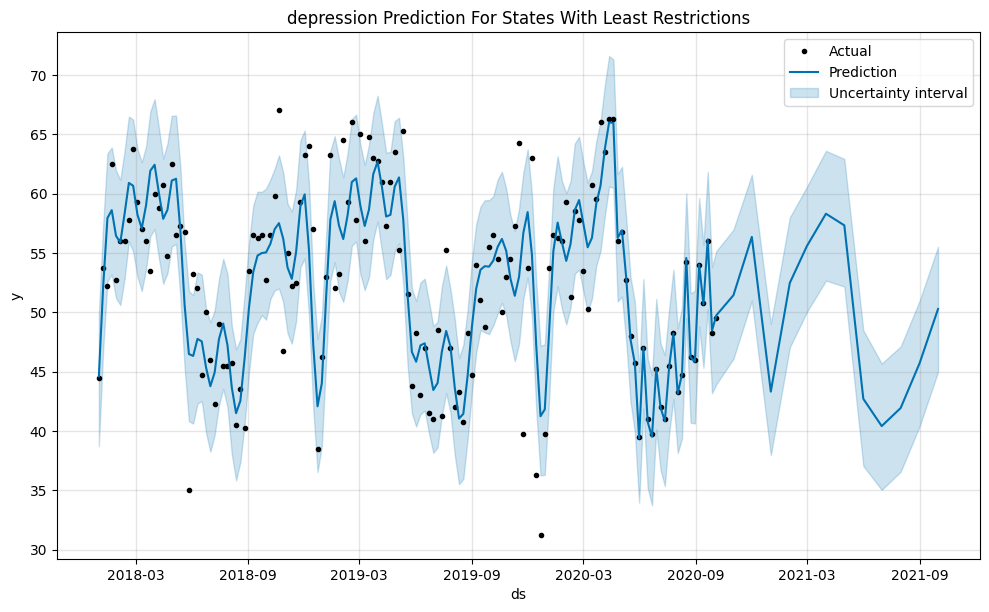

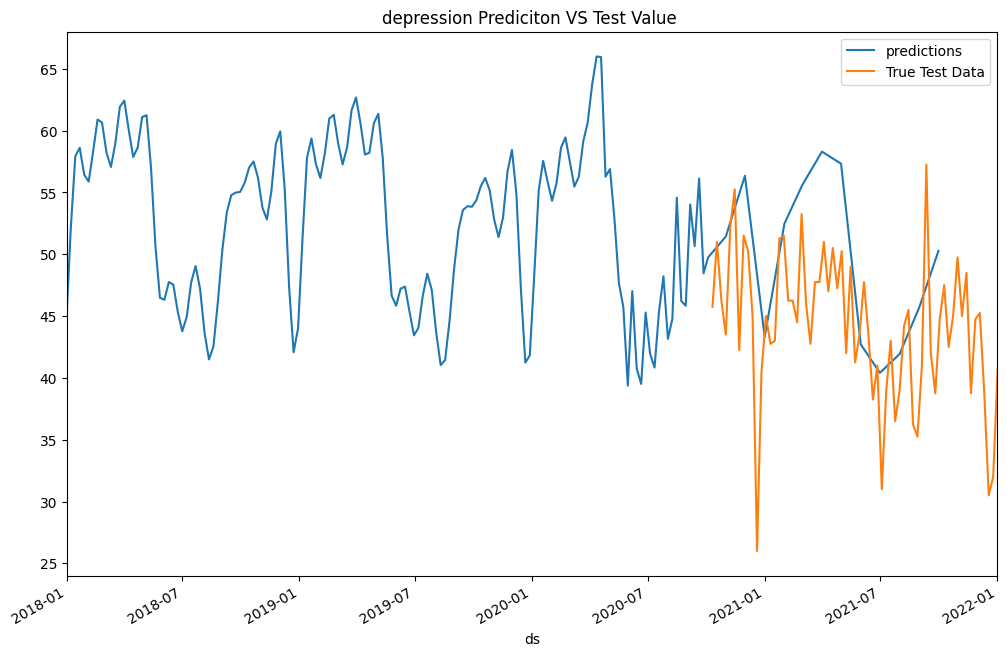

MSE for depression: 89


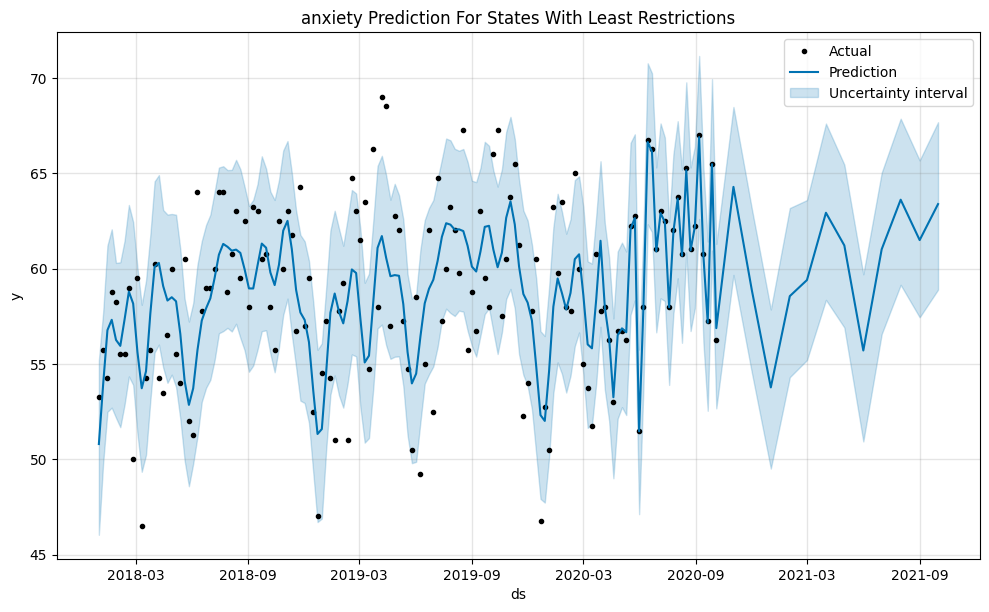

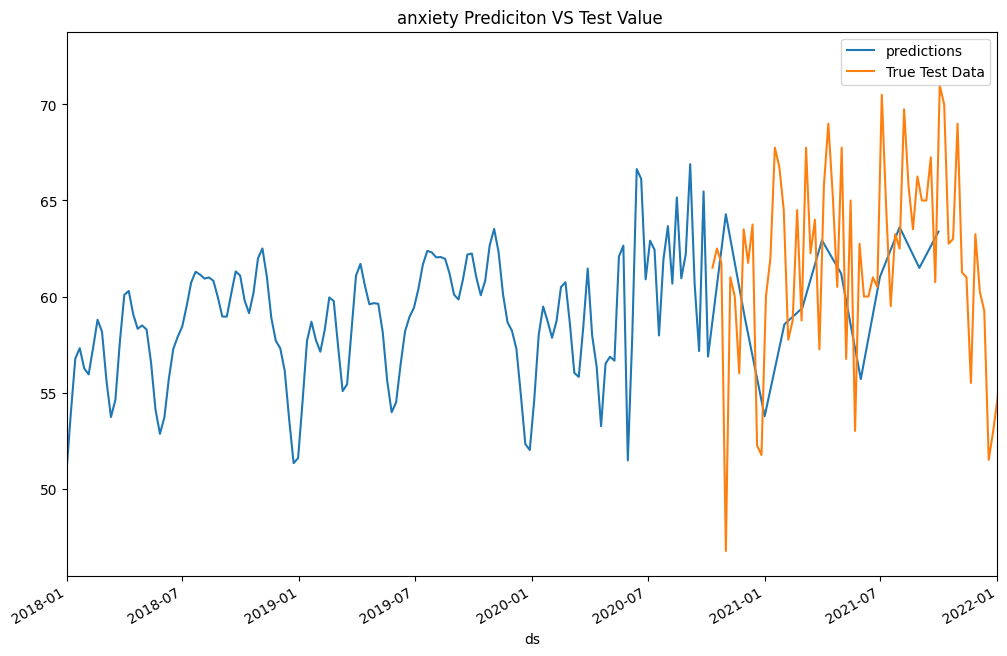

MSE for anxiety: 37


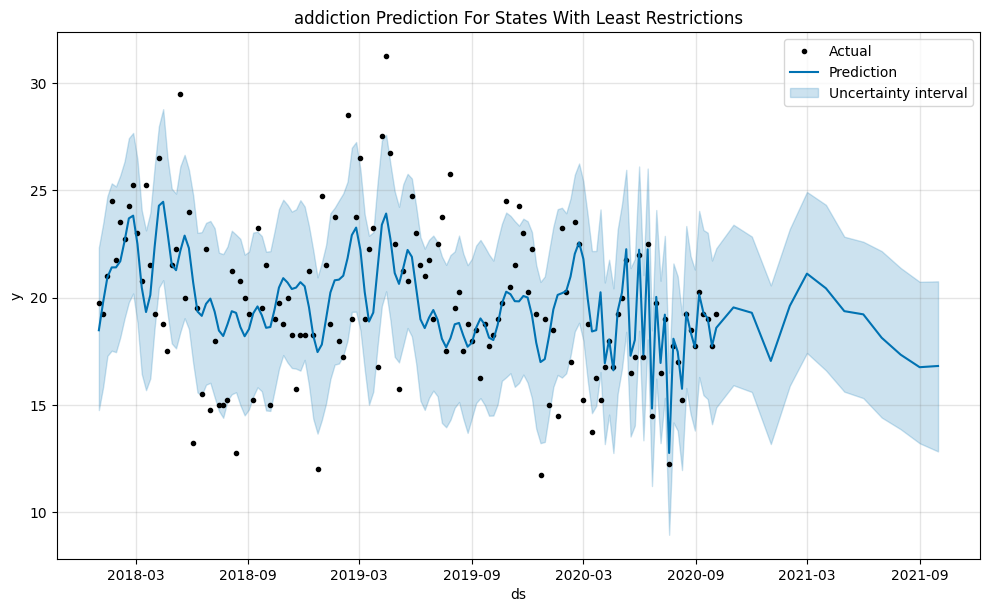

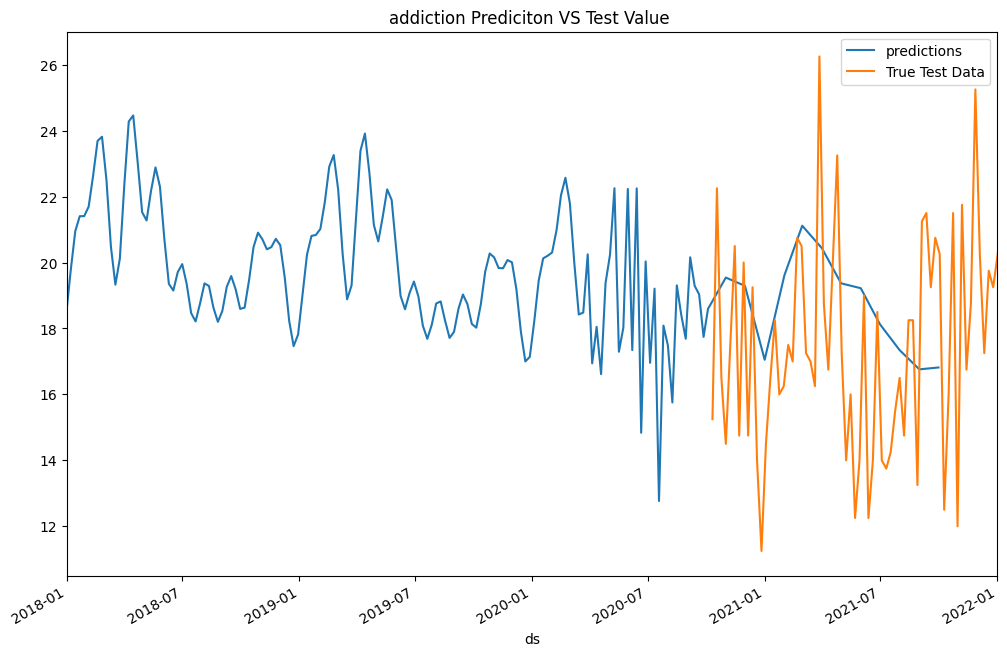

MSE for addiction: 13


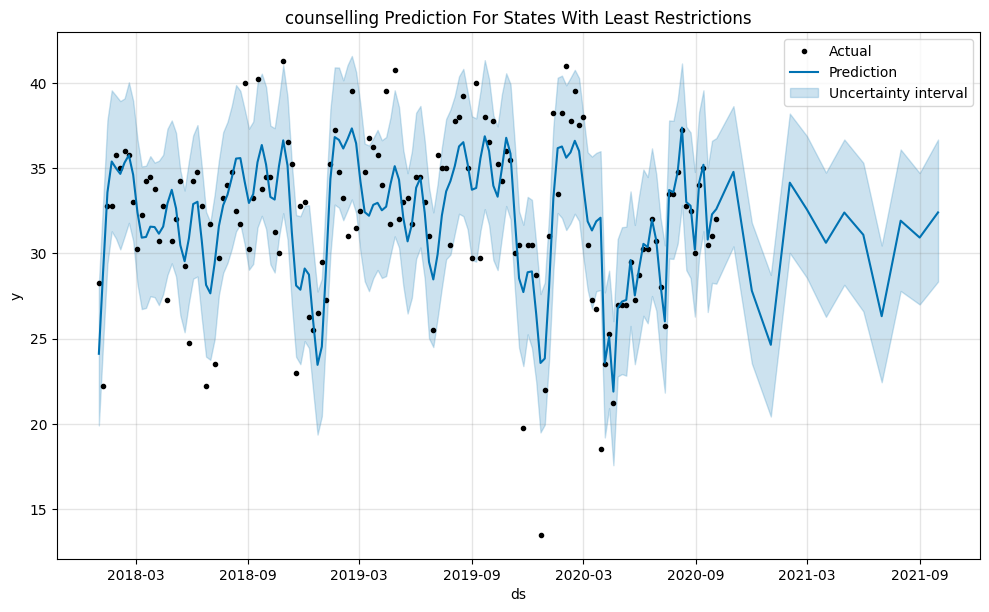

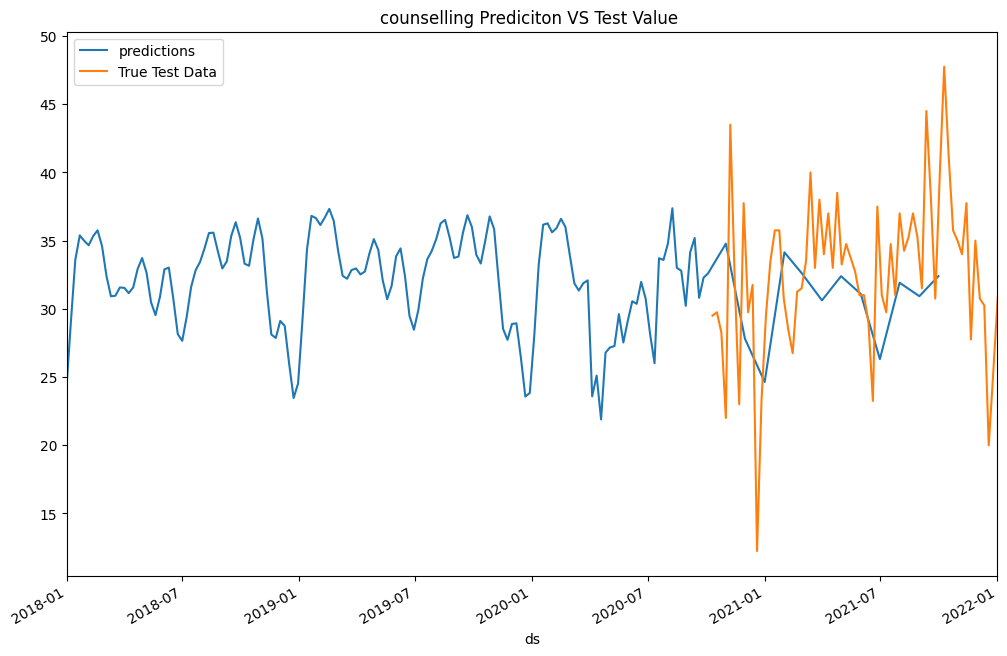

MSE for counselling: 38


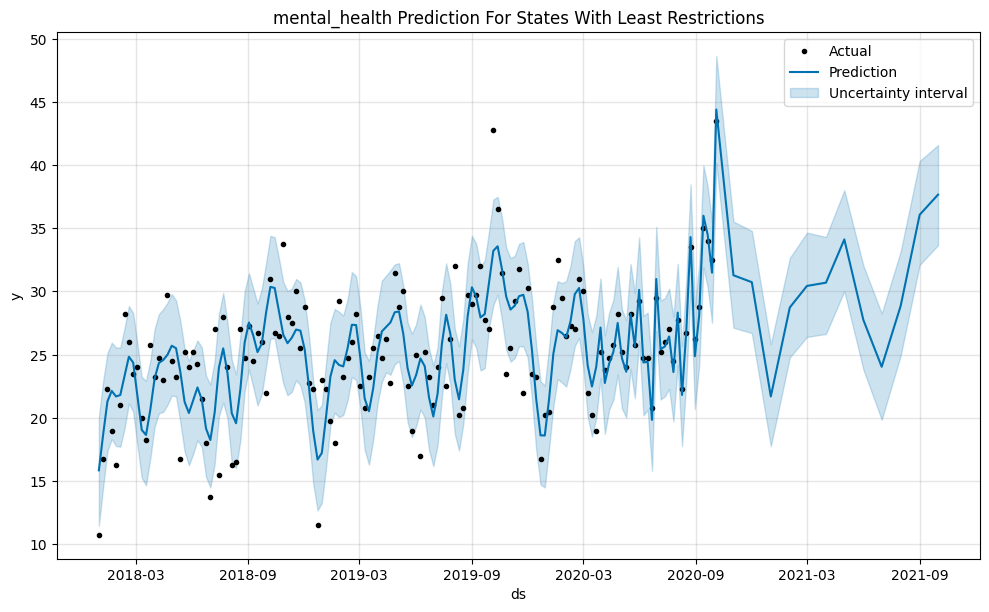

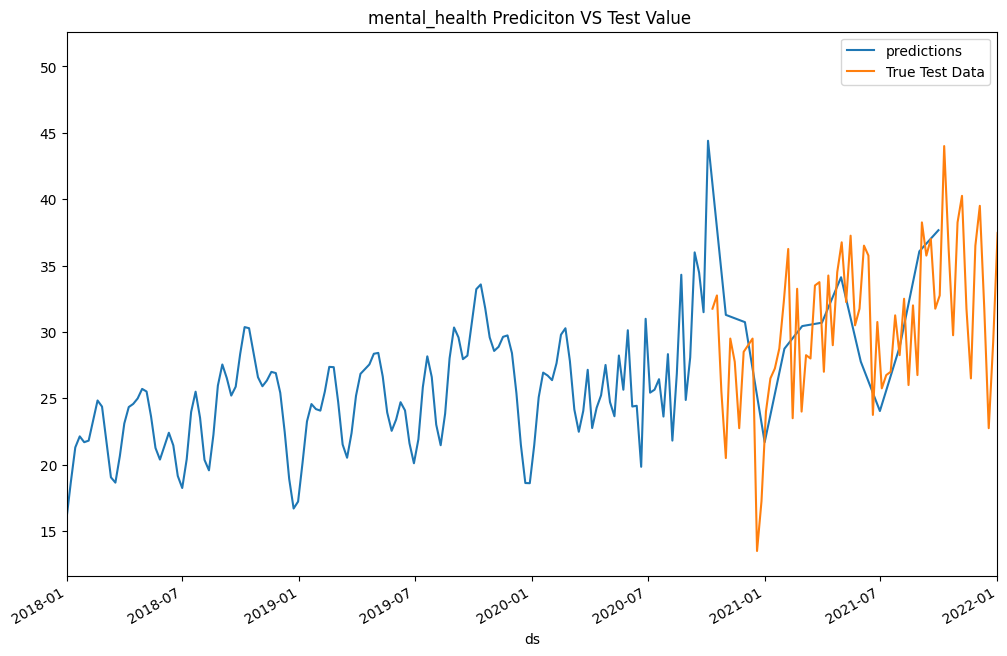

MSE for mental_health: 97


In [42]:
mse_dic_least_mid = {}
for c in interesting_columns:
    item = least_restricted_df[c]
    item['ds']=pd.to_datetime(item.ds)

    
    train=item[:145]
    test=item[145:]
    m=Prophet(holidays=least_lockdowns,seasonality_mode='multiplicative',daily_seasonality=False,weekly_seasonality=False)
    m.fit(train)
    future=m.make_future_dataframe(periods=12,freq='MS')
    forecast=m.predict(future)
    m.plot(forecast)
    plt.legend(['Actual', 'Prediction', 'Uncertainty interval'])
    plt.title(f'{c} Prediction For States With Least Restrictions')
    ax=forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
    test.plot(x='ds',y='y',legend=True,label='True Test Data',ax=ax,xlim=('2018-01-01','2022-01-01'))
    predictions = forecast.iloc[-len(test):]['yhat']
    actuals = test['y']
    dic_mse = round(mse(predictions, actuals))
    mse_dic_least_mid[f'{c}_ex'] = dic_mse
    plt.title(f'{c} Prediciton VS Test Value ')
    plt.show()


    print(f"MSE for {c}: {round(mse(predictions, actuals))}")

# Least Restricted States Without exogenous features '2020-09-30'

In [43]:

for c in interesting_columns:
    item = least_restricted_df[c]
    item['ds']=pd.to_datetime(item.ds)
    
    train=item[:145]
    test=item[145:]
    m=Prophet(seasonality_mode='multiplicative',daily_seasonality=False,weekly_seasonality=False)
    m.fit(train)
    future=m.make_future_dataframe(periods=12,freq='MS')
    forecast=m.predict(future)
    predictions = forecast.iloc[-len(test):]['yhat']
    actuals = test['y']
    dic_mse = round(mse(predictions, actuals))
    mse_dic_least_mid[c] = dic_mse
    print(f"MSE for {c}: {round(mse(predictions, actuals))}")

MSE for depression: 89
MSE for anxiety: 34
MSE for addiction: 13
MSE for counselling: 35
MSE for mental_health: 92


In [44]:
rf_diff_least = functions.dict_diff(mse_dic_least_mid)
print(rf_diff_least)

{'depression': 0, 'anxiety': 3, 'addiction': 0, 'counselling': 3, 'mental_health': 5}


# Prophet Searches for Most Restricted towards the end of COVID-19 Pandemic 2021-01-01
# Most restricted states with exogenous features

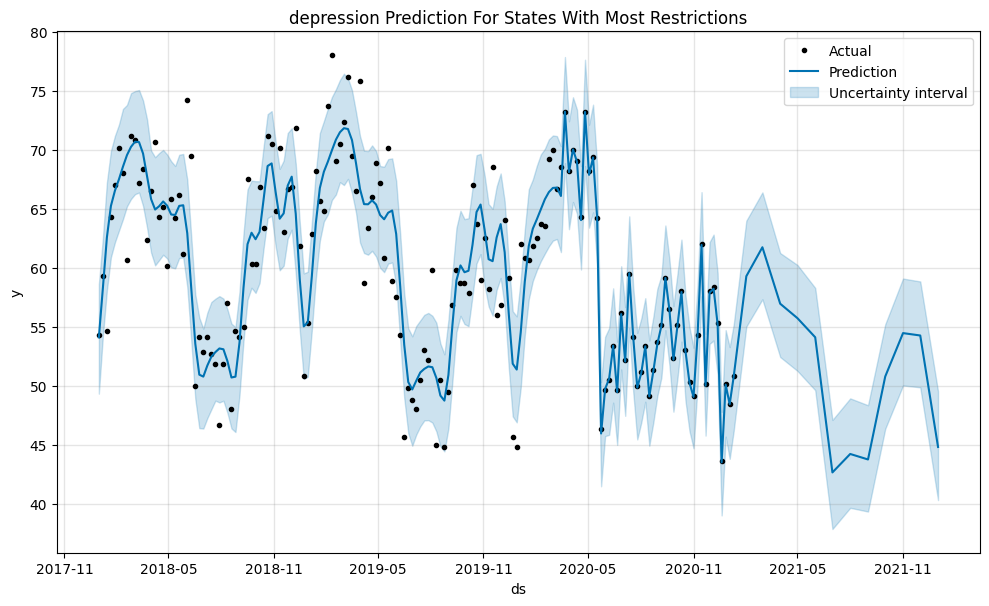

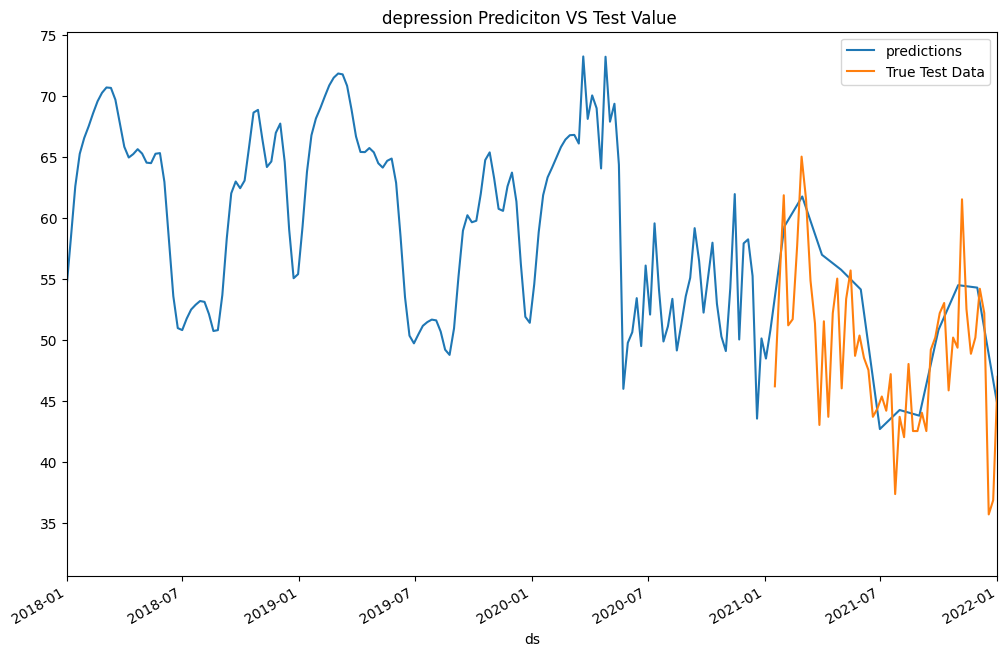

MSE for depression: 160


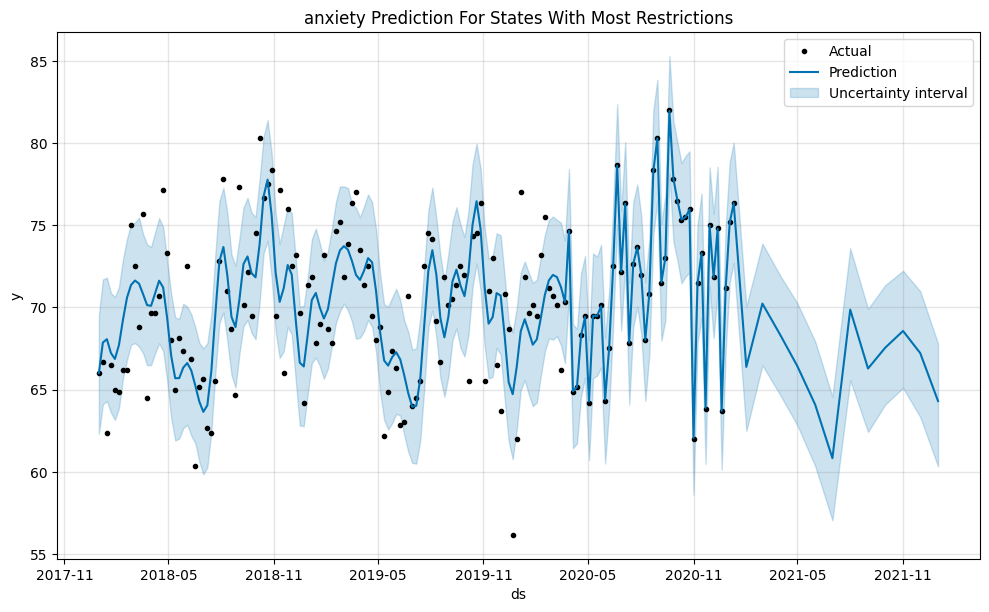

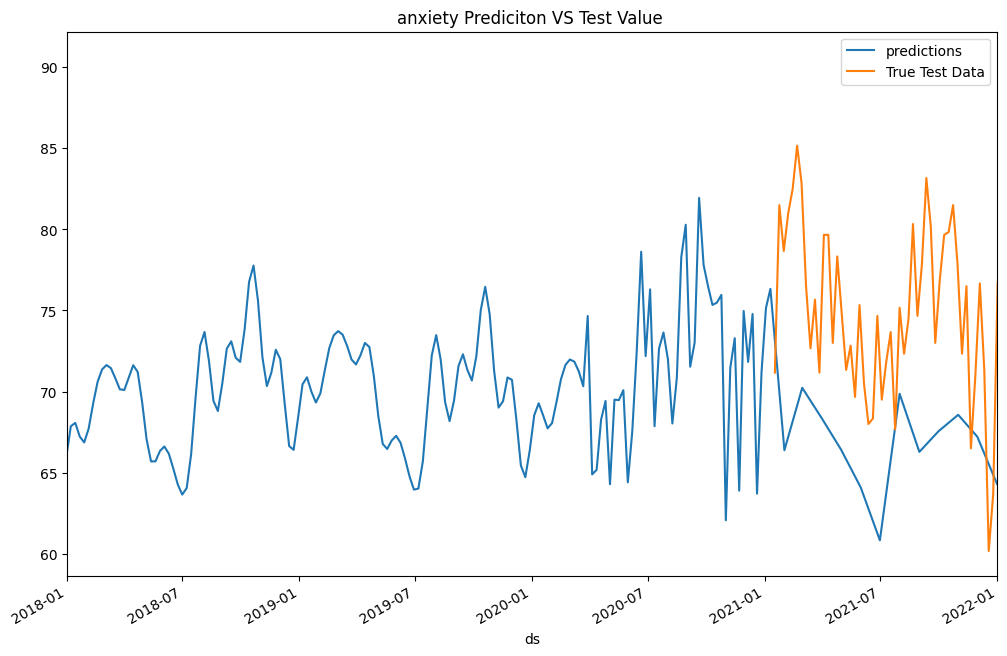

MSE for anxiety: 80


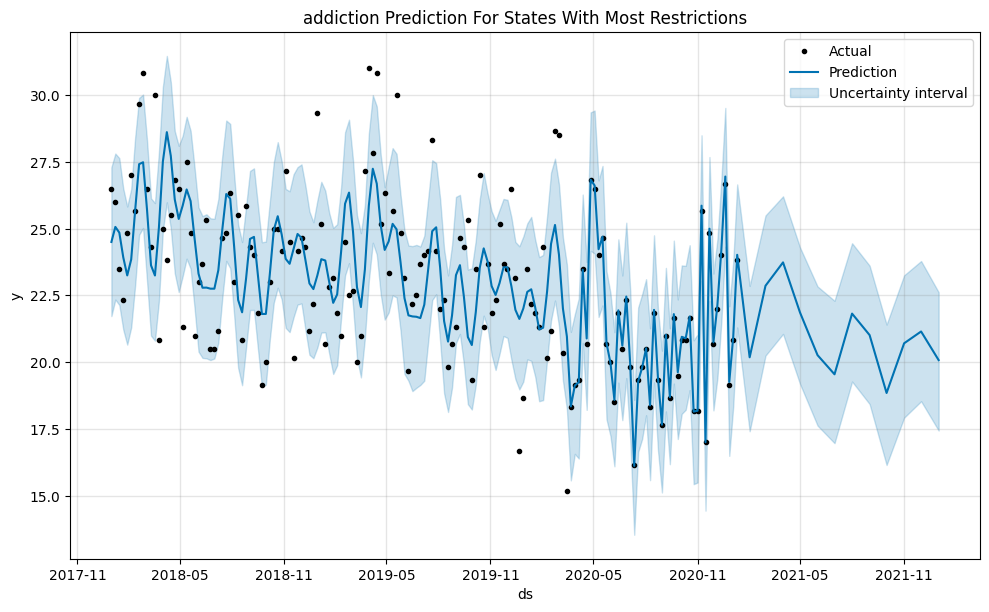

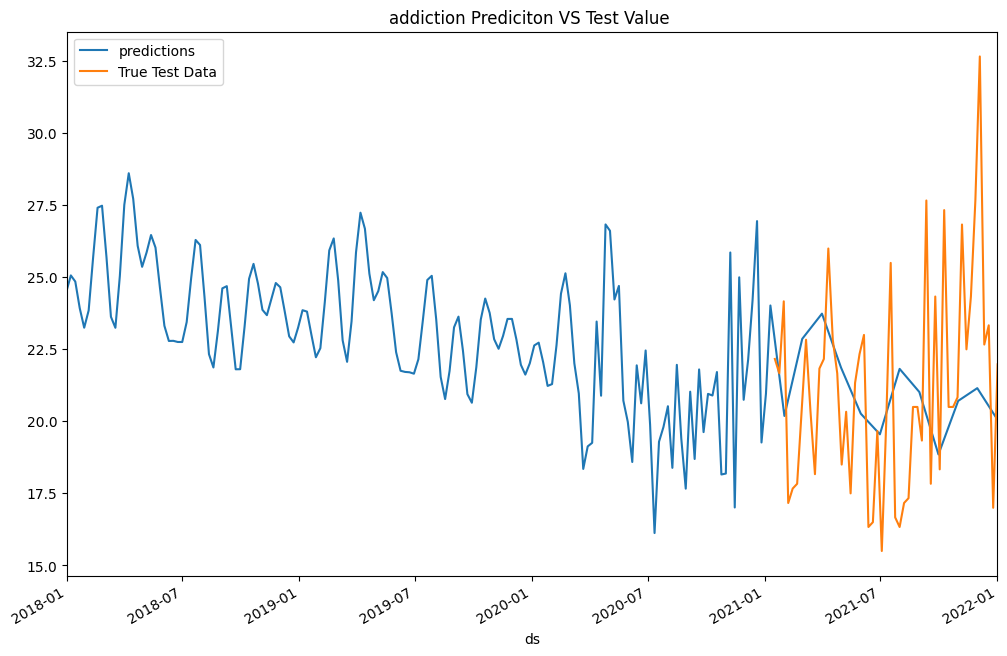

MSE for addiction: 12


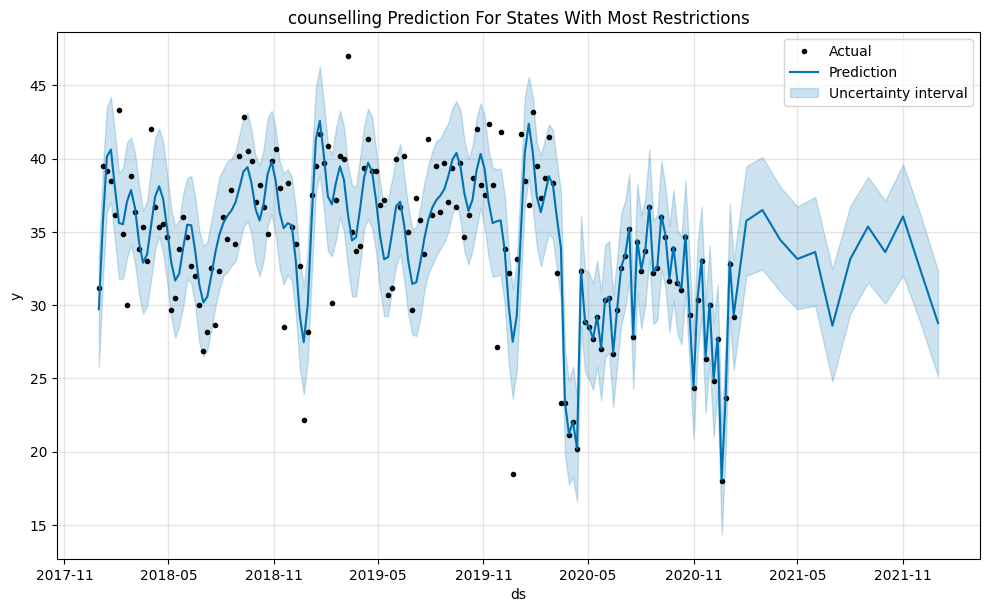

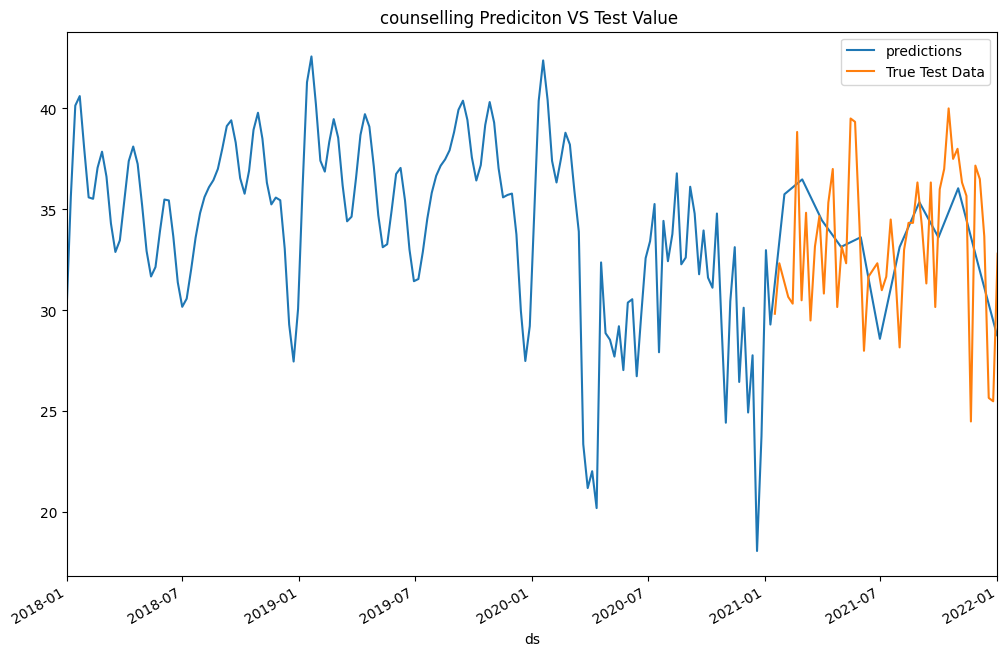

MSE for counselling: 35


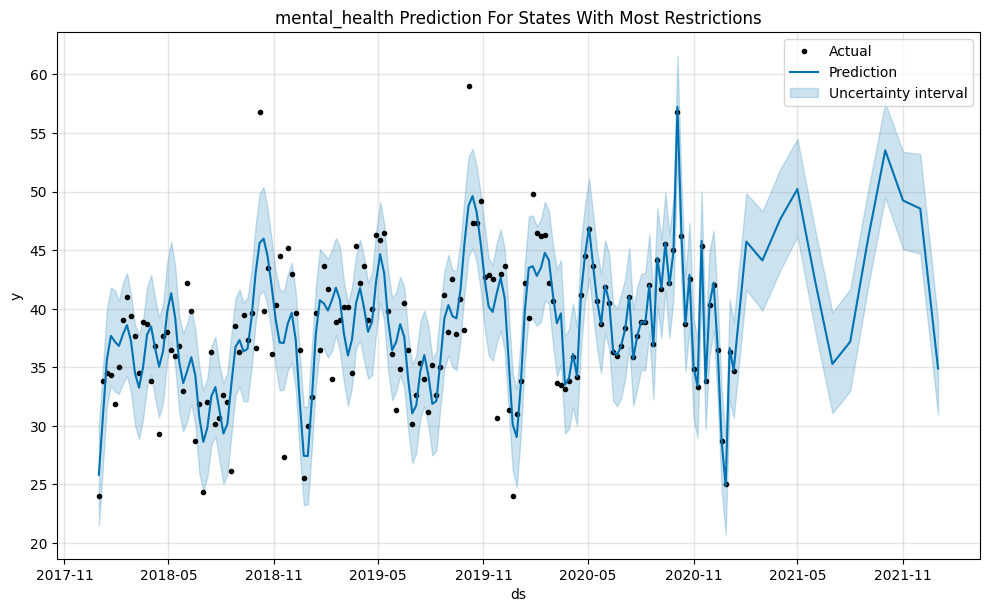

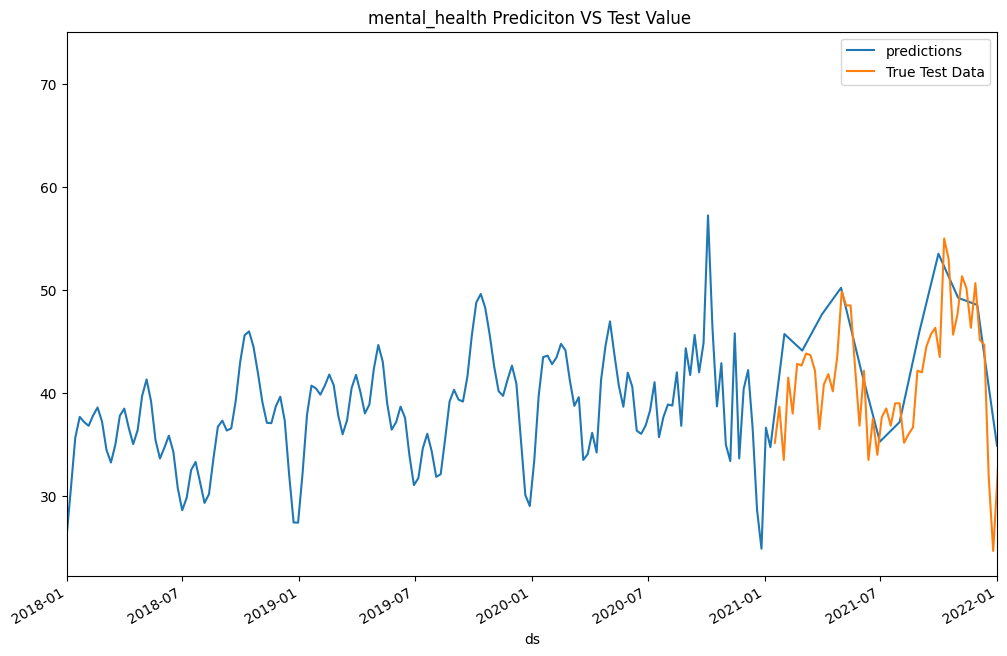

MSE for mental_health: 162


In [49]:
mse_dic_most_end = {}
for c in interesting_columns:
    item = most_restricted_df[c]
    item['ds']=pd.to_datetime(item.ds)
    
   

    
    train=item[:159]
    test=item[159:]
    m=Prophet(holidays=most_lockdowns,seasonality_mode='multiplicative',daily_seasonality=False,weekly_seasonality=False)
    m.fit(train)
    future=m.make_future_dataframe(periods=12,freq='MS')
    forecast=m.predict(future)
    m.plot(forecast)
    plt.legend(['Actual', 'Prediction', 'Uncertainty interval'])
    plt.title(f'{c} Prediction For States With Most Restrictions')
    ax=forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
    test.plot(x='ds',y='y',legend=True,label='True Test Data',ax=ax,xlim=('2018-01-01','2022-01-01'))
    predictions = forecast.iloc[-len(test):]['yhat']
    actuals = test['y']
    dic_mse = round(mse(predictions, actuals))
    mse_dic_most_end[f'{c}_ex'] = dic_mse
    plt.title(f'{c} Prediciton VS Test Value ')
    plt.show()


    print(f"MSE for {c}: {round(mse(predictions, actuals))}")

# Most restricted without exogenous features 2021-01-01

In [50]:
for c in interesting_columns:
    item = most_restricted_df[c]
    item['ds']=pd.to_datetime(item.ds)
    
    train=item[:159]
    test=item[159:]
    m=Prophet(daily_seasonality=False,weekly_seasonality=False)
    m.fit(train)
    future=m.make_future_dataframe(periods=12,freq='MS')
    forecast=m.predict(future)
    predictions = forecast.iloc[-len(test):]['yhat']
    actuals = test['y']
    dic_mse = round(mse(predictions, actuals))
    mse_dic_most_end[c] = dic_mse
    print(f"MSE for {c}: {round(mse(predictions, actuals))}")

MSE for depression: 160
MSE for anxiety: 67
MSE for addiction: 11
MSE for counselling: 31
MSE for mental_health: 168


In [51]:
rf_diff_least = functions.dict_diff(mse_dic_most_end)
print(rf_diff_least)

{'depression': 0, 'anxiety': 13, 'addiction': 1, 'counselling': 4, 'mental_health': -6}


# Least restricted with exogenous features 2021-01-01


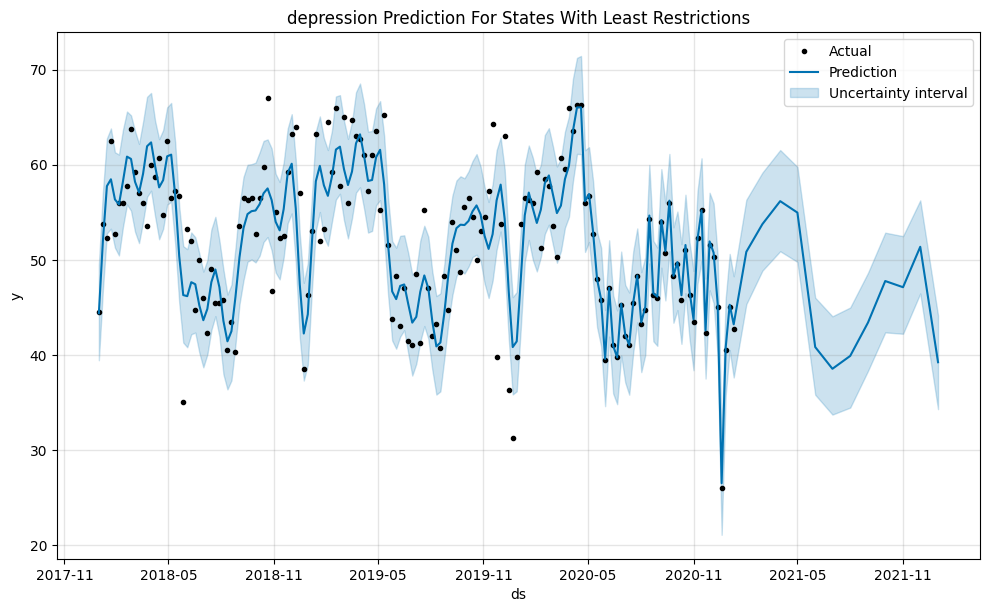

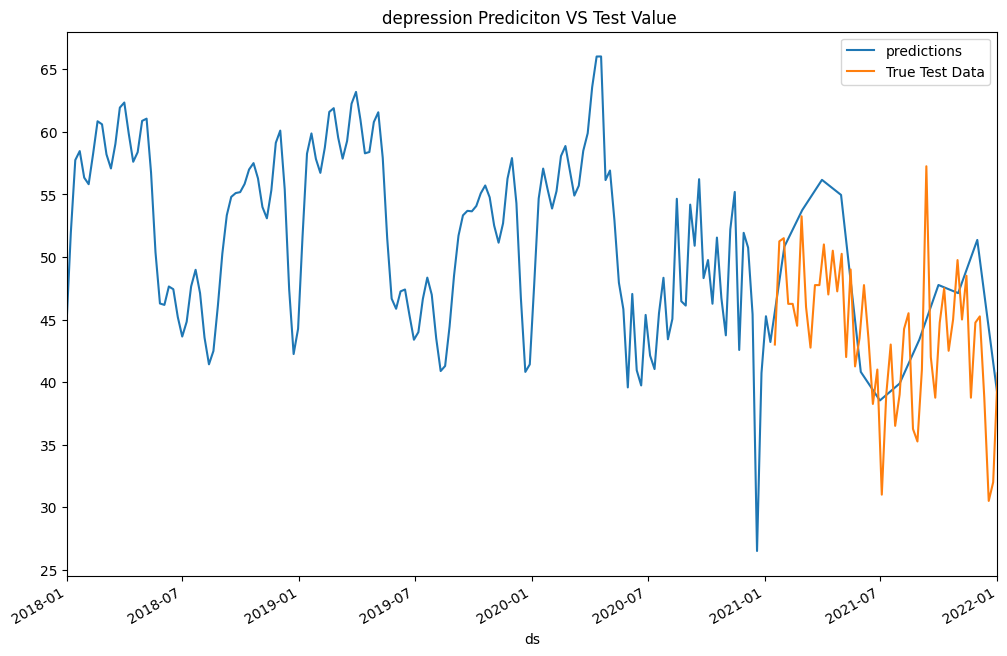

MSE for depression: 153


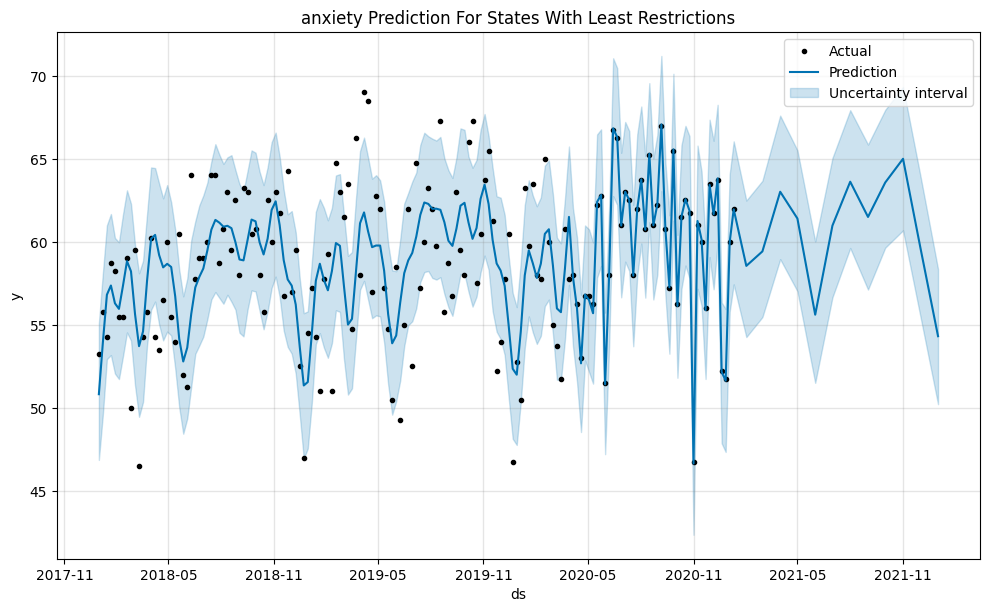

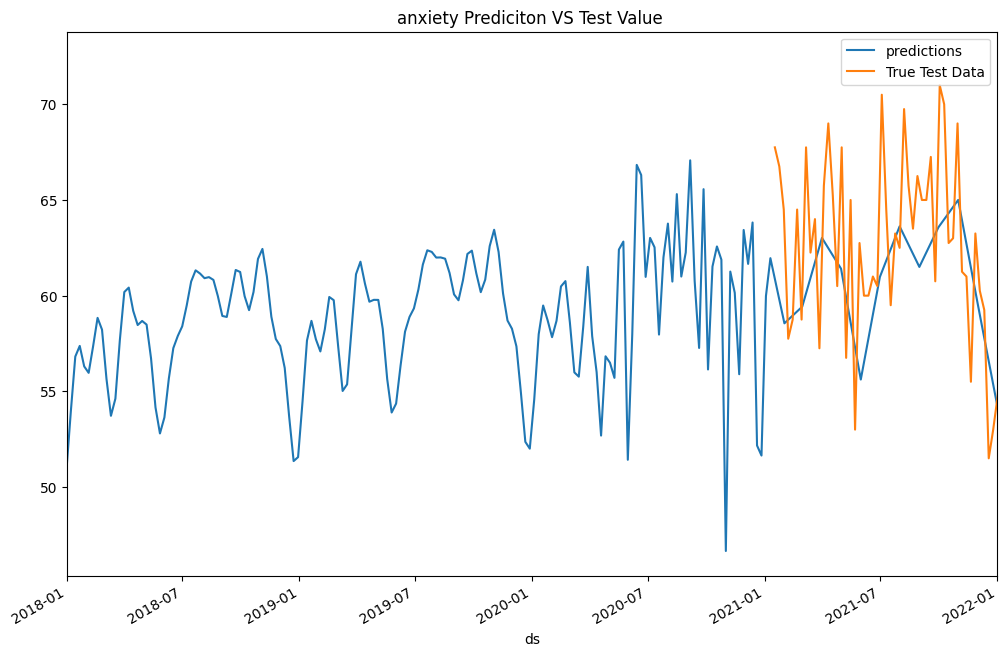

MSE for anxiety: 48


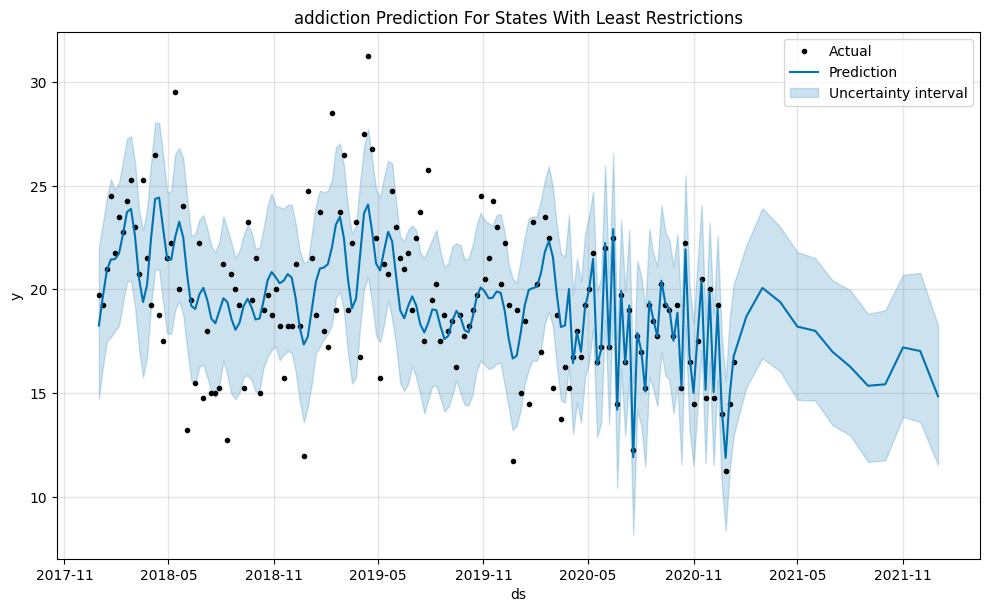

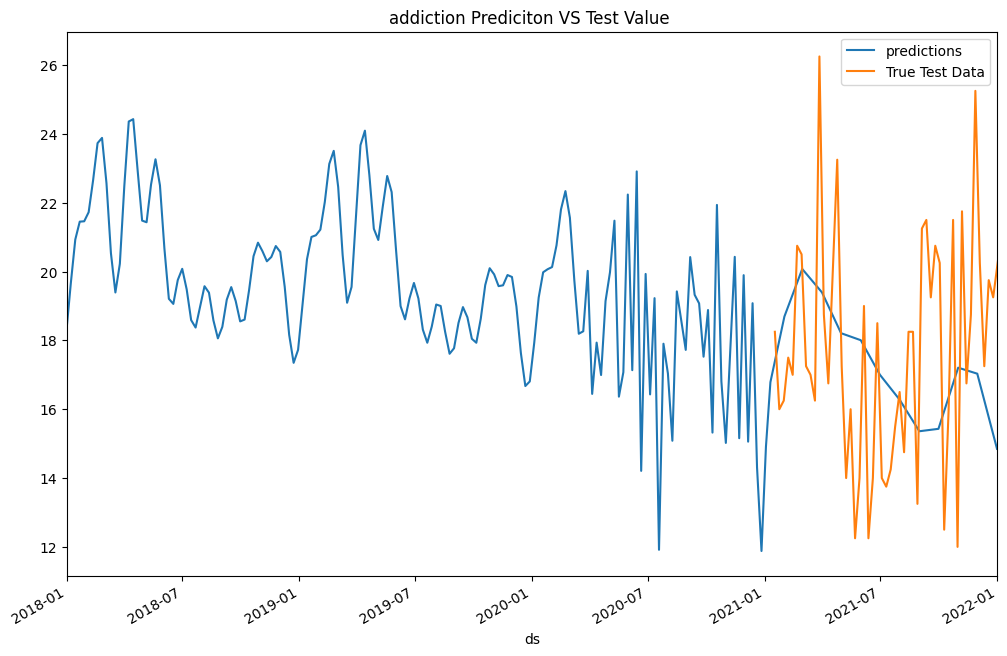

MSE for addiction: 16


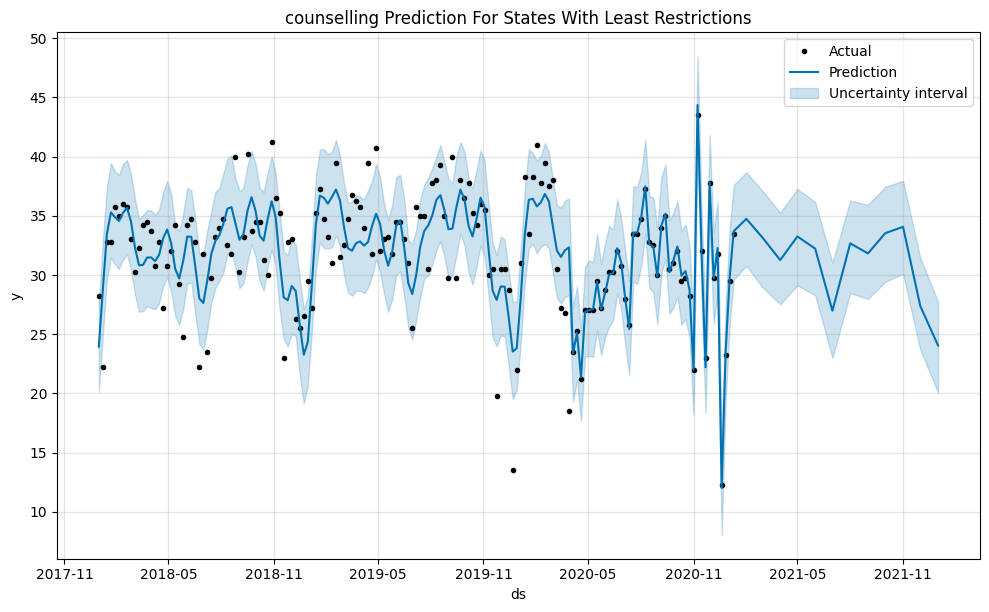

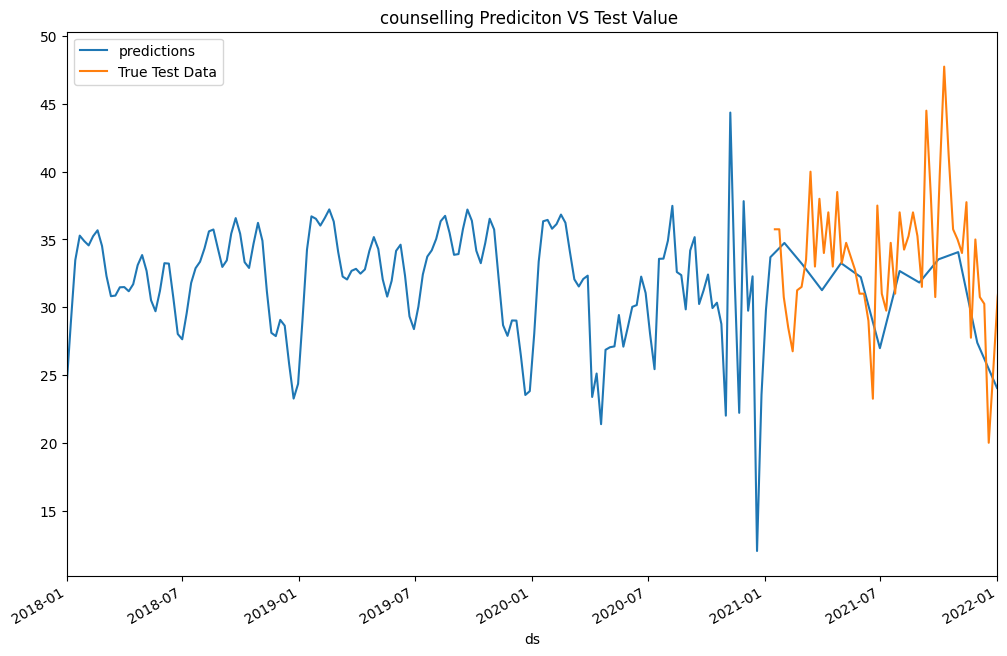

MSE for counselling: 57


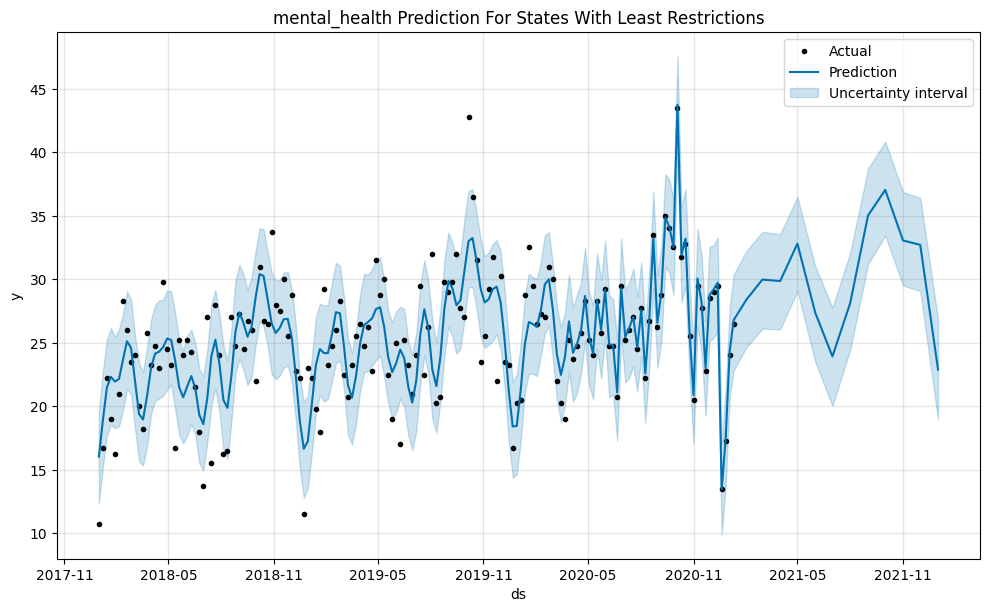

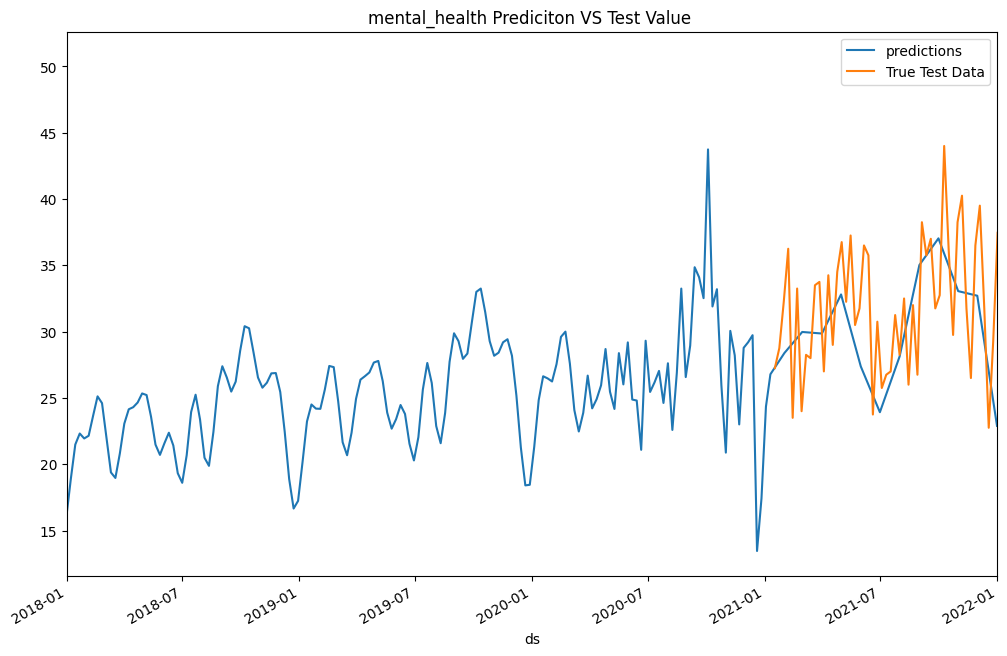

MSE for mental_health: 124


In [52]:
mse_dic_least_end = {}
for c in interesting_columns:
    item = least_restricted_df[c]
    item['ds']=pd.to_datetime(item.ds)



    
    train=item[:159]
    test=item[159:]
    m=Prophet(holidays=least_lockdowns,seasonality_mode='multiplicative',daily_seasonality=False,weekly_seasonality=False)
    m.fit(train)
    future=m.make_future_dataframe(periods=12,freq='MS')
    forecast=m.predict(future)
    m.plot(forecast)
    plt.legend(['Actual', 'Prediction', 'Uncertainty interval'])
    plt.title(f'{c} Prediction For States With Least Restrictions')
    ax=forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
    test.plot(x='ds',y='y',legend=True,label='True Test Data',ax=ax,xlim=('2018-01-01','2022-01-01'))
    predictions = forecast.iloc[-len(test):]['yhat']
    actuals = test['y']
    dic_mse = round(mse(predictions, actuals))
    mse_dic_least_end[f'{c}_ex'] = dic_mse
    plt.title(f'{c} Prediciton VS Test Value ')
    plt.show()


    print(f"MSE for {c}: {round(mse(predictions, actuals))}")

# Least restricted without exogenous features 2021-01-01


In [53]:
for c in interesting_columns:
    item = least_restricted_df[c]
    item['ds']=pd.to_datetime(item.ds)
    
    train=item[:159]
    test=item[159:]
    m=Prophet(seasonality_mode='multiplicative',daily_seasonality=False,weekly_seasonality=False)
    m.fit(train)
    future=m.make_future_dataframe(periods=12,freq='MS')
    forecast=m.predict(future)
    predictions = forecast.iloc[-len(test):]['yhat']
    actuals = test['y']
    dic_mse = round(mse(predictions, actuals))
    mse_dic_least_end[c] = dic_mse
    print(f"MSE for {c}: {round(mse(predictions, actuals))}")

MSE for depression: 140
MSE for anxiety: 43
MSE for addiction: 13
MSE for counselling: 47
MSE for mental_health: 123


In [54]:
rf_diff_least = functions.dict_diff(mse_dic_least_end)
print(rf_diff_least)

{'depression': 13, 'anxiety': 5, 'addiction': 3, 'counselling': 10, 'mental_health': 1}


### Conclusion:
Overall the prophet models did not benefit from adding lockdowns as a one-off holiday. 
All three time frames for modeling had a better MSE without lockdown/holidays added as 
a factor except for predicting depression searches in states with high lockdowns during 
mid covid and mental_health searches for states with least restrictions during mid covid.